
# <center> **Porcesamiento y mejora de astrofotografía planetaria empleando Generative Adversarial Networks** </center>

<center>

## **Equipo 1**

</center>

*   Arantxa Camil Junco Flores  
*   Diego Antonio Villalba González
*   Jonathan Alexis Hernández Cuevas




<center> 

## **Resumen**
 </center>
En este notebook exponemos el proceso de desarrollo de una Generative Adversarial Network junto al procesamiento de imágenes planetarias con el fin de mejorar la resolución, detalle y contraste de las imágenes obtenidas de fuentes de baja resolución y alto ruido intrínseco o fuentes externas.

Obtuvimos resultados satisfactorios aplicables a diferentes áreas de procesamiento de imágenes en la industria, como cámaras de seguridad, ultrasonidos, etc.


## **Índice**
$$ $$
<font size=3 >
1.- [Introducción](#id1)
<ul>
    <li>1.1 La astrofotografía planetaria
    <li>1.2 Las SRGAN
    <li>1.3 El proceso a seguir
</ul>
    
2.- [Obtención de los datos](#id2)
<ul>
    <li>2.1 Obtención de datos observacionales planetarios y lunares
    <li>2.2 Obtención de imágenes para entrenamiento
</ul>

3.- [Stacking de imagenes](#id3)
<ul>
    <li>3.1 Procesamiento de los frames obtenidos 
    <li>3.2 Las dos técnicas existentes
    <li>3.3 Elección de la técnica dependiendo de la imagen 
</ul>

4.- [Aplicación de filtros de convolución](#id4)
</ul>
    <li>4.1 Su uso para aumentar la estructura de la imagen
</ul>

5.- [Implementación de la Red Neuronal (SRGAN)](#id5)
<ul>
    <li>5.1 Arquitectura de la red neuronal
    <li>5.2 Hiperparámetros y optimización
    <li>5.3 Resumen del modelo
    <li>5.4 Entrenamiento
    <li>5.5 Gráficas de costo y precisión
    <li>5.6 Desarrollo del testing
</ul>

6.- [Evaluación de resultados ](#id6)
<ul>
    <li>6.1 Testing en las imágenes con filtro.
    <li>6.2 Comparaciones con los inputs.
    <li>6.3 Cálculos de la métrica de mejora.
    <li>6.3 Otras apliaciones.
</ul>


Conectamos a drive para tener imágenes y para uso psoterior

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div id='id1' />  

## **Introducción**

<ul>
    <li>1.1 La astrofotografía </li>
La astrofotografía combina la astrofísica y la fotografía para capturar imágenes del cielo nocturno y objetos astronómicos. Ha experimentado una evolución desde las placas fotográficas hasta las cámaras digitales de alta resolución.

![Astro_1](https://www.rmg.co.uk/sites/default/files/styles/full_width_1440/public/PS2195402171243_Highly%20Commended_Cosmic%20Plughole%20%C2%A9%20James%20Stone_0.jpg?itok=yiNJeW76)


Los avances tecnológicos han permitido tiempos de exposición más cortos y la visualización instantánea de imágenes, mejorando los resultados. También se han desarrollado equipos especializados, como telescopios motorizados y sistemas de seguimiento.

Sin embargo, la astrofotografía enfrenta desafíos como la contaminación lumínica, que reduce la calidad de las imágenes y requiere viajar a áreas con cielos oscuros. El ruido electrónico de las cámaras digitales y la estabilidad del seguimiento del telescopio también son problemas a superar.

![Astro_2](https://cdn.eso.org/images/screen/dark-skies.jpg)

![Astro_3](https://www.cloudynights.com/uploads/monthly_01_2006/post-14351-14070956155523.jpg)


<li>1.2 Las SRGAN </li>
El SRGAN utiliza una arquitectura basada en Generative Adversarial Networks (GANS), que consiste en dos redes neuronales en competencia: el generador y el discriminador. El generador es responsable de tomar una imagen de baja resolución como entrada y generar una versión de alta resolución de la misma. El discriminador, por otro lado, tiene la tarea de distinguir entre las imágenes generadas por el generador y las imágenes reales de alta resolución.

![Astro_4](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-07-19_at_11.13.45_AM_zsF2pa7.png)


La idea principal detrás de SRGAN es que el generador aprenda a generar imágenes de alta resolución que sean difíciles de distinguir de las imágenes reales de alta resolución, mientras que el discriminador aprende a identificar las imágenes generadas y las imágenes reales. A medida que estas dos redes compiten entre sí, se produce un proceso de aprendizaje en el que el generador mejora continuamente su capacidad para generar imágenes más realistas y de alta calidad.


<li>1.3 Porblemática a desarrollar</li>

Dentro de la astrofotografía el area de la astrofotografía planetaria es una de las más retadoras, recordemos que los planetas son objetos muy pequeños dentro del cielo nocturno además de que recorren el cielo nocturno con gran velocidad, aunado a las diferentes fuentes de interferencia natural y artificial hacen que el tomar una unica fotografía entrege reultados de baja calidad, es así que uno de los procesos mas comunes para disminuir el ruido ambiental y la aberración cromatica generada por el rápido movimiento de los planetas es la toma de un video con un camara colocada en el telescopio, grabando de manera continua el objeto en un intervalo de tiempo.

[Ejemplo de video de luna empleado en este notebook](https://drive.google.com/file/d/1zZpBY8-_lqFtdxu65OUoj4IY653Ls3Ly/view?usp=share_link)

[Ejemplo de video de Jupiter empleado en este notebook](https://drive.google.com/file/d/1WKNzMGnaJxTFWAIEgbwu-bm1BF1oW22x/view?usp=share_link)


Posteriormente se extraen los mejores frames de el video por medio de diferentes programas, los cuales promedian la información de cada frame y entregan una imagen, la cual puede ser procesada posteriomente en un proggrama de edición fotográfica.

![Astro_1](https://skyandtelescope.org/wp-content/uploads/Figure-4-web.jpg)


Sin embargo la calidad del resultado presenta importantes limitaciones, al emplear un video para obtener la información estamos limitados a la resolcuón del mismo para la fotografía final, teniendo como ejemplo fotografias de 1920 x 1080 pixeles en caso de que el video haya sido tomado en calidad full hd.

![Superficie lunar resultante de un video full hd](https://m.media-amazon.com/images/I/61etx+8gdCL._CR289,0,1154,1154_UX256.jpg)

Es por esto que buscamos por medio de este notebook emular un proceso similar agregando las ventajas que nos representan las SRGAN para mejorar la resolución de las fotos obtenidas, y poder obtener mas información a partir de fuentes de baja resolución y con alta interferencia.

</ul>



<div id='id2' />

## **Obtención de los datos**
<ul>
  <li>2.1 Obtención de datos observacionales planetarios y lunares</li>
  
Para la obtención del dataset con las imagenes de los cuerpos celestes a trabajar (Luna, Saturno y Jupiter) se utilizaron 2 diferentes telescopios, un Telescopio reflector PowerSeeker 114mm EQ montado con una cámara canon EOS Rebel T5 (Diego Villalba), junto a un telescopio Orion Apex de 127 mm de tipo Maksutov-Cassegrain, con una camara planetaria ZWO ASI con resolución full HD (Ing. Alfredo García Flores).

Se obtuvieron 8 videos de la luna, de los cuales 5 de ellos fuerón sólo enfocando una parte de la luna y los otros 3 enfocando a la luna de manera completa; por otro lado, de Saturno se tomó un sólo video, haciendo lo mismo con Jupiter, esto mediante un setup como el de la imagen.  
![Setup](https://10minuteastronomy.files.wordpress.com/2012/07/apex-127-and-travel-scope-70.jpg)


Posterior a lo anterior, para poder obtener el conjunto de datos utilizamos PIPP (Planetary Imaging PreProcessor), una aplicación de Windows diseñada para preprocesar imágenes planetarias, donde se puede recortar cada cuadro de imagen y seleccionar solo los cuadros de mejor calidad para reducir los requisitos de procesamiento y memoria empleada por nuestra red neuronal.

![PIPP](https://img.informer.com/pf/pipp-v2.5-main-window-outlook.png)

![PIPP_R](https://deepskyworkflows.com/assets/images/2022-02-20/pippcamera1.jpg)

Por otro lado, se planteó una estategia para llevar a cabo nuestras imagenes de procesamiento planetaria; como primera parte, se tomaron las mejores 1200 imagenes de ambos planetas y del satelite natural de la tierra, después, se tomaron las mejores 100 para contrastar el resultado al hacerle el proceso de stacking, y asi obtener las muestras a mejorar en nuestras redes neuronales.

  <li>2.2 Esecificaciones del equipo utilizado.</li>
    <ul>
      <li>2.2.1 Telescopio PowerSeeker 114 EQ</li>
El telescopio PowerSeeker 114 EQ es un modelo de telescopio reflector Newtoniano con una apertura de 114 mm y una longitud focal de 900 mm. Viene con una montura ecuatorial EQ que permite un seguimiento preciso de los objetos astronómicos. Incluye oculares, un buscador de punto rojo y accesorios adicionales.
      <li>2.2.2 Cámara Canon EOS Rebel T5</li>
Cuenta con un sensor de 18 megapíxeles, un sistema de enfoque automático de 9 puntos y una velocidad de disparo continuo de hasta 3 fotogramas por segundo. Puede grabar video Full HD y ofrece opciones de conectividad como USB y HDMI. Es una cámara versátil y fácil de usar para aquellos que desean iniciar su experiencia en la fotografía.
      <li>2.2.3 Telescopio Orion Apex 127mm Maksutov-Cassegrain </li>
Cuenta con una apertura de 127 mm y una distancia focal de 1540 mm, ofrece imágenes nítidas y detalladas de objetos celestes. Su diseño óptico Maksutov-Cassegrain combina un espejo cóncavo y una lente correctora, lo que resulta en un sistema compacto y de alta calidad óptica.

cuenta con un buscador de punto rojo que ayuda a alinear el telescopio con los objetos deseados en el cielo. Además, su rosca de montaje para adaptadores de cámara permite la conexión de una cámara DSLR para la astrofotografía, lo que brinda la oportunidad de capturar imágenes impresionantes del universo.
    </ul>
  </li>
</ul>



<ul>
    <li>2.1 Obtención de imágenes para entrenamiento
</ul>

Una vez con nuestros datos observacionales para Júpiter, Saturno y la Luna, decidimos entrenar el modelo cuatro veces: tres únicamente con 150 imágenes de cada uno de los planetas (o luna) antes mencionados, y una con las 450 imágenes en conjunto. La idea fue aplicarle a cada planeta su modelo entrenado, y luego usar uno general y potencialmente mejorado.

Para obtener de forma más eficiente las imágenes de un navegador usamos el siguiente código, parte del cual obtuvimos de https://github.com/ultralytics/google-images-download

In [ ]:
# Bing Images and Google Images web scraper

# Example usage:
#   python bing_scraper.py --url 'https://www.bing.com/images/search?q=flowers' --limit 10
#   python bing_scraper.py --search 'honeybees on flowers' --limit 10

import argparse
import codecs
import datetime
import html
import http.client
import json
import os
import random
import re
import ssl
import sys
import time  # Importing the time library to check the time of code execution
import urllib.request
from http.client import IncompleteRead, BadStatusLine
from urllib.parse import quote
from urllib.request import Request, urlopen
from urllib.request import URLError, HTTPError

from tqdm import tqdm

http.client._MAXHEADERS = 1000

args_list = ["keywords", "keywords_from_file", "prefix_keywords", "suffix_keywords",
             "limit", "format", "color", "color_type", "usage_rights", "size",
             "exact_size", "aspect_ratio", "type", "time", "time_range", "delay", "url", "single_image",
             "output_directory", "image_directory", "proxy", "similar_images", "specific_site",
             "print_urls", "print_size", "print_paths", "metadata", "extract_metadata", "socket_timeout",
             "language", "prefix", "chromedriver", "related_images", "safe_search",
             "no_numbering", "offset", "download", "save_source", "silent_mode", "ignore_urls"]

def user_input():
    config = argparse.ArgumentParser()
    config.add_argument('-cf', '--config_file', help='config file name', default='', type=str, required=False)
    config_file_check = config.parse_known_args()
    object_check = vars(config_file_check[0])

    if object_check['config_file'] != '':
        records = []
        json_file = json.load(open(config_file_check[0].config_file))
        for record in range(0, len(json_file['Records'])):
            arguments = {}
            for i in args_list:
                arguments[i] = None
            for key, value in json_file['Records'][record].items():
                arguments[key] = value
            records.append(arguments)
    else:
        # Taking command line arguments from users
        parser = argparse.ArgumentParser()
        parser.add_argument('-k', '--keywords', help='delimited list input', type=str, required=False)
        parser.add_argument('-kf', '--keywords_from_file', help='extract list of keywords from a text file', type=str,
                            required=False)
        parser.add_argument('-sk', '--suffix_keywords',
                            help='comma separated additional words added after to main keyword', type=str,
                            required=False)
        parser.add_argument('-pk', '--prefix_keywords',
                            help='comma separated additional words added before main keyword', type=str, required=False)
        parser.add_argument('-l', '--limit', help='delimited list input', type=str, required=False)
        parser.add_argument('-f', '--format', help='download images with specific format', type=str, required=False,
                            choices=['jpg', 'gif', 'png', 'bmp', 'svg', 'webp', 'ico'])
        parser.add_argument('-u', '--url', help='search with google image URL', type=str, required=False)
        parser.add_argument('-x', '--single_image', help='downloading a single image from URL', type=str,
                            required=False)
        parser.add_argument('-o', '--output_directory', help='download images in a specific main directory', type=str,
                            required=False)
        parser.add_argument('-i', '--image_directory', help='download images in a specific sub-directory', type=str,
                            required=False)
        parser.add_argument('-d', '--delay', help='delay in seconds to wait between downloading two images', type=int,
                            required=False)
        parser.add_argument('-co', '--color', help='filter on color', type=str, required=False,
                            choices=['red', 'orange', 'yellow', 'green', 'teal', 'blue', 'purple', 'pink', 'white',
                                     'gray', 'black', 'brown'])
        parser.add_argument('-ct', '--color_type', help='filter on color', type=str, required=False,
                            choices=['full-color', 'black-and-white', 'transparent'])
        parser.add_argument('-r', '--usage_rights', help='usage rights', type=str, required=False,
                            choices=['labeled-for-reuse-with-modifications', 'labeled-for-reuse',
                                     'labeled-for-noncommercial-reuse-with-modification',
                                     'labeled-for-nocommercial-reuse'])
        parser.add_argument('-s', '--size', help='image size', type=str, required=False,
                            choices=['large', 'medium', 'icon', '>400*300', '>640*480', '>800*600', '>1024*768', '>2MP',
                                     '>4MP', '>6MP', '>8MP', '>10MP', '>12MP', '>15MP', '>20MP', '>40MP', '>70MP'])
        parser.add_argument('-es', '--exact_size', help='exact image resolution "WIDTH,HEIGHT"', type=str,
                            required=False)
        parser.add_argument('-t', '--type', help='image type', type=str, required=False,
                            choices=['face', 'photo', 'clipart', 'line-drawing', 'animated'])
        parser.add_argument('-w', '--time', help='image age', type=str, required=False,
                            choices=['past-24-hours', 'past-7-days', 'past-month', 'past-year'])
        parser.add_argument('-wr', '--time_range',
                            help='time range for the age of the image. should be in the format {"time_min":"MM/DD/YYYY","time_max":"MM/DD/YYYY"}',
                            type=str, required=False)
        parser.add_argument('-a', '--aspect_ratio', help='comma separated additional words added to keywords', type=str,
                            required=False,
                            choices=['tall', 'square', 'wide', 'panoramic'])
        parser.add_argument('-si', '--similar_images',
                            help='downloads images very similar to the image URL you provide', type=str, required=False)
        parser.add_argument('-ss', '--specific_site', help='downloads images that are indexed from a specific website',
                            type=str, required=False)
        parser.add_argument('-p', '--print_urls', default=False, help="Print the URLs of the images",
                            action="store_true")
        parser.add_argument('-ps', '--print_size', default=False, help="Print the size of the images on disk",
                            action="store_true")
        parser.add_argument('-pp', '--print_paths', default=False,
                            help="Prints the list of absolute paths of the images", action="store_true")
        parser.add_argument('-m', '--metadata', default=False, help="Print the metadata of the image",
                            action="store_true")
        parser.add_argument('-e', '--extract_metadata', default=False, help="Dumps all the logs into a text file",
                            action="store_true")
        parser.add_argument('-st', '--socket_timeout', default=False,
                            help="Connection timeout waiting for the image to download", type=float)
        parser.add_argument('-la', '--language', default=False,
                            help="Defines the language filter. The search results are authomatically returned in that language",
                            type=str, required=False,
                            choices=['Arabic', 'Chinese (Simplified)', 'Chinese (Traditional)', 'Czech', 'Danish',
                                     'Dutch', 'English', 'Estonian', 'Finnish', 'French', 'German', 'Greek', 'Hebrew',
                                     'Hungarian', 'Icelandic', 'Italian', 'Japanese', 'Korean', 'Latvian', 'Lithuanian',
                                     'Norwegian', 'Portuguese', 'Polish', 'Romanian', 'Russian', 'Spanish', 'Swedish',
                                     'Turkish'])
        parser.add_argument('-pr', '--prefix', default=False,
                            help="A word that you would want to prefix in front of each image name", type=str,
                            required=False)
        parser.add_argument('-px', '--proxy', help='specify a proxy address and port', type=str, required=False)
        parser.add_argument('-cd', '--chromedriver', help='chromedriver path', type=str, default='./chromedriver')
        parser.add_argument('-ri', '--related_images', default=False,
                            help="Downloads images that are similar to the keyword provided", action="store_true")
        parser.add_argument('-sa', '--safe_search', default=False,
                            help="Turns on the safe search filter while searching for images", action="store_true")
        parser.add_argument('-nn', '--no_numbering', default=False,
                            help="Allows you to exclude the default numbering of images", action="store_true")
        parser.add_argument('-of', '--offset', help="Where to start in the fetched links", type=str, required=False)
        parser.add_argument('--download', default=False, help='Download images', action="store_true")
        parser.add_argument('-iu', '--ignore_urls', default=False,
                            help="delimited list input of image urls/keywords to ignore", type=str)
        parser.add_argument('-sil', '--silent_mode', default=False,
                            help="Remains silent. Does not print notification messages on the terminal",
                            action="store_true")
        parser.add_argument('-is', '--save_source',
                            help="creates a text file containing a list of downloaded images along with source page url",
                            type=str, required=False)
        parser.add_argument('--search', type=str, default='', help='search string, i.e. bees on flowers')
        args = parser.parse_args()

        if args.search:  # construct url
            args.url = 'https://www.bing.com/images/search?q=%s' % args.search.replace(' ', '%20')
            args.image_directory = args.search.replace(' ', '_')

        arguments = vars(args)
        records = []
        records.append(arguments)
    return records


class googleimagesdownload:
    def __init__(self):
        pass

    # Downloading entire Web Document (Raw Page Content)
    def download_page(self, url):
        try:
            headers = {}
            headers[
                'User-Agent'] = "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36"
            req = urllib.request.Request(url, headers=headers)
            resp = urllib.request.urlopen(req)
            respData = str(resp.read())
            return respData
        except Exception as e:
            print("Could not open URL. Please check your internet connection and/or ssl settings \n"
                  "If you are using proxy, make sure your proxy settings is configured correctly")
            sys.exit()

    # Download Page for more than 100 images
    def download_extended_page(self, url, chromedriver):
        from selenium import webdriver
        from selenium.webdriver.common.keys import Keys
        options = webdriver.ChromeOptions()
        options.add_argument('--no-sandbox')
        options.add_argument("--headless")

        try:
            browser = webdriver.Chrome(chromedriver, options=options)
        except Exception as e:
            print("chromedriver not found (use the '--chromedriver' argument to specify the path to the executable)"
                  "or google chrome browser is not installed on your machine (exception: %s)" % e)
            sys.exit()
        browser.set_window_size(1920, 3840)  # 4k

        # Open the link
        browser.get(url)
        time.sleep(0.5)

        element = browser.find_element_by_tag_name("body")
        pbar = tqdm(enumerate(range(30)), desc='Downloading HTML...', total=30)  # progress bar
        for _ in pbar:
            try:  # click 'see more' button if found
                # browser.find_element_by_id("smb").click()  # google images 'see more' button
                browser.find_element_by_class_name('btn_seemore').click()  # bing images 'see more' button
            except:
                pass
            pbar.desc = 'Downloading HTML... %d elements' % len(browser.page_source)  # page source
            element.send_keys(Keys.PAGE_DOWN)
            time.sleep(random.random() * 0.2 + 0.1)  # bot id protection

        source = browser.page_source  # page source
        browser.close()  # close browser

        return source

    # Correcting the escape characters for python2
    def replace_with_byte(self, match):
        return chr(int(match.group(0)[1:], 8))

    def repair(self, brokenjson):
        invalid_escape = re.compile(r'\\[0-7]{1,3}')  # up to 3 digits for byte values up to FF
        return invalid_escape.sub(self.replace_with_byte, brokenjson)

    # Finding 'Next Image' from the given raw page
    def get_next_tab(self, s):
        start_line = s.find('class="dtviD"')
        if start_line == -1:  # If no links are found then give an error!
            end_quote = 0
            link = "no_tabs"
            return link, '', end_quote
        else:
            start_line = s.find('class="dtviD"')
            start_content = s.find('href="', start_line + 1)
            end_content = s.find('">', start_content + 1)
            url_item = "https://www.google.com" + str(s[start_content + 6:end_content])
            url_item = url_item.replace('&amp;', '&')

            start_line_2 = s.find('class="dtviD"')
            s = s.replace('&amp;', '&')
            start_content_2 = s.find(':', start_line_2 + 1)
            end_content_2 = s.find('&usg=', start_content_2 + 1)
            url_item_name = str(s[start_content_2 + 1:end_content_2])

            chars = url_item_name.find(',g_1:')
            chars_end = url_item_name.find(":", chars + 6)
            if chars_end == -1:
                updated_item_name = (url_item_name[chars + 5:]).replace("+", " ")
            else:
                updated_item_name = (url_item_name[chars + 5:chars_end]).replace("+", " ")

            return url_item, updated_item_name, end_content

    # Getting all links with the help of '_images_get_next_image'
    def get_all_tabs(self, page):
        tabs = {}
        while True:
            item, item_name, end_content = self.get_next_tab(page)
            if item == "no_tabs":
                break
            else:
                if len(item_name) > 100 or item_name == "background-color":
                    break
                else:
                    tabs[item_name] = item  # Append all the links in the list named 'Links'
                    time.sleep(0.1)  # Timer could be used to slow down the request for image downloads
                    page = page[end_content:]
        return tabs

    # Format the object in readable format
    def format_object(self, object):
        if '?' in object['murl']:
            object['murl'] = object['murl'].split('?')[0]
        formatted_object = {}
        formatted_object['image_format'] = object['murl'].split('.')[-1]
        formatted_object['image_height'] = False
        formatted_object['image_width'] = False
        formatted_object['image_link'] = object['murl'].replace(" ", "+")
        formatted_object['image_description'] = object['desc']
        formatted_object['image_host'] = object['purl']
        formatted_object['image_source'] = object['purl']
        return formatted_object

    # function to download single image
    def single_image(self, image_url):
        main_directory = "images"
        extensions = ('.bmp', '.jpg', '.jpeg', '.png', '.tif', '.tiff', '.dng')
        url = image_url
        try:
            os.makedirs(main_directory)
        except OSError as e:
            if e.errno != 17:
                raise
            pass
        req = Request(url, headers={
            "User-Agent": "Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.27 Safari/537.17"})

        response = urlopen(req, None, 10)
        data = response.read()
        response.close()

        image_name = str(url[(url.rfind('/')) + 1:])
        if '?' in image_name:
            image_name = image_name[:image_name.find('?')]
        # if ".jpg" in image_name or ".gif" in image_name or ".png" in image_name or ".bmp" in image_name or ".svg" in image_name or ".webp" in image_name or ".ico" in image_name:
        if any(map(lambda extension: extension in image_name, extensions)):
            file_name = main_directory + "/" + image_name
        else:
            file_name = main_directory + "/" + image_name + ".jpg"
            image_name = image_name + ".jpg"

        try:
            output_file = open(file_name, 'wb')
            output_file.write(data)
            output_file.close()
        except IOError as e:
            raise e
        except OSError as e:
            raise e
        print("completed ====> " + image_name.encode('raw_unicode_escape').decode('utf-8'))
        return

    def similar_images(self, similar_images):
        try:
            searchUrl = 'https://www.google.com/searchbyimage?site=search&sa=X&image_url=' + similar_images
            headers = {}
            headers[
                'User-Agent'] = "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36"

            req1 = urllib.request.Request(searchUrl, headers=headers)
            resp1 = urllib.request.urlopen(req1)
            content = str(resp1.read())
            l1 = content.find('AMhZZ')
            l2 = content.find('&', l1)
            urll = content[l1:l2]

            newurl = "https://www.google.com/search?tbs=sbi:" + urll + "&site=search&sa=X"
            req2 = urllib.request.Request(newurl, headers=headers)
            resp2 = urllib.request.urlopen(req2)
            l3 = content.find('/search?sa=X&amp;q=')
            l4 = content.find(';', l3 + 19)
            urll2 = content[l3 + 19:l4]
            return urll2
        except:
            return "Cloud not connect to Google Images endpoint"

    # Building URL parameters
    def build_url_parameters(self, arguments):
        if arguments['language']:
            lang = "&lr="
            lang_param = {"Arabic": "lang_ar", "Chinese (Simplified)": "lang_zh-CN",
                          "Chinese (Traditional)": "lang_zh-TW", "Czech": "lang_cs", "Danish": "lang_da",
                          "Dutch": "lang_nl", "English": "lang_en", "Estonian": "lang_et", "Finnish": "lang_fi",
                          "French": "lang_fr", "German": "lang_de", "Greek": "lang_el", "Hebrew": "lang_iw ",
                          "Hungarian": "lang_hu", "Icelandic": "lang_is", "Italian": "lang_it", "Japanese": "lang_ja",
                          "Korean": "lang_ko", "Latvian": "lang_lv", "Lithuanian": "lang_lt", "Norwegian": "lang_no",
                          "Portuguese": "lang_pt", "Polish": "lang_pl", "Romanian": "lang_ro", "Russian": "lang_ru",
                          "Spanish": "lang_es", "Swedish": "lang_sv", "Turkish": "lang_tr"}
            lang_url = lang + lang_param[arguments['language']]
        else:
            lang_url = ''

        if arguments['time_range']:
            json_acceptable_string = arguments['time_range'].replace("'", "\"")
            d = json.loads(json_acceptable_string)
            time_range = ',cdr:1,cd_min:' + d['time_min'] + ',cd_max:' + d['time_max']
        else:
            time_range = ''

        if arguments['exact_size']:
            size_array = [x.strip() for x in arguments['exact_size'].split(',')]
            exact_size = ",isz:ex,iszw:" + str(size_array[0]) + ",iszh:" + str(size_array[1])
        else:
            exact_size = ''

        built_url = "&tbs="
        counter = 0
        params = {'color': [arguments['color'], {'red': 'ic:specific,isc:red', 'orange': 'ic:specific,isc:orange',
                                                 'yellow': 'ic:specific,isc:yellow', 'green': 'ic:specific,isc:green',
                                                 'teal': 'ic:specific,isc:teel', 'blue': 'ic:specific,isc:blue',
                                                 'purple': 'ic:specific,isc:purple', 'pink': 'ic:specific,isc:pink',
                                                 'white': 'ic:specific,isc:white', 'gray': 'ic:specific,isc:gray',
                                                 'black': 'ic:specific,isc:black', 'brown': 'ic:specific,isc:brown'}],
                  'color_type': [arguments['color_type'],
                                 {'full-color': 'ic:color', 'black-and-white': 'ic:gray', 'transparent': 'ic:trans'}],
                  'usage_rights': [arguments['usage_rights'],
                                   {'labeled-for-reuse-with-modifications': 'sur:fmc', 'labeled-for-reuse': 'sur:fc',
                                    'labeled-for-noncommercial-reuse-with-modification': 'sur:fm',
                                    'labeled-for-nocommercial-reuse': 'sur:f'}],
                  'size': [arguments['size'],
                           {'large': 'isz:l', 'medium': 'isz:m', 'icon': 'isz:i', '>400*300': 'isz:lt,islt:qsvga',
                            '>640*480': 'isz:lt,islt:vga', '>800*600': 'isz:lt,islt:svga',
                            '>1024*768': 'visz:lt,islt:xga', '>2MP': 'isz:lt,islt:2mp', '>4MP': 'isz:lt,islt:4mp',
                            '>6MP': 'isz:lt,islt:6mp', '>8MP': 'isz:lt,islt:8mp', '>10MP': 'isz:lt,islt:10mp',
                            '>12MP': 'isz:lt,islt:12mp', '>15MP': 'isz:lt,islt:15mp', '>20MP': 'isz:lt,islt:20mp',
                            '>40MP': 'isz:lt,islt:40mp', '>70MP': 'isz:lt,islt:70mp'}],
                  'type': [arguments['type'], {'face': 'itp:face', 'photo': 'itp:photo', 'clipart': 'itp:clipart',
                                               'line-drawing': 'itp:lineart', 'animated': 'itp:animated'}],
                  'time': [arguments['time'], {'past-24-hours': 'qdr:d', 'past-7-days': 'qdr:w', 'past-month': 'qdr:m',
                                               'past-year': 'qdr:y'}],
                  'aspect_ratio': [arguments['aspect_ratio'],
                                   {'tall': 'iar:t', 'square': 'iar:s', 'wide': 'iar:w', 'panoramic': 'iar:xw'}],
                  'format': [arguments['format'],
                             {'jpg': 'ift:jpg', 'gif': 'ift:gif', 'png': 'ift:png', 'bmp': 'ift:bmp', 'svg': 'ift:svg',
                              'webp': 'webp', 'ico': 'ift:ico', 'raw': 'ift:craw'}]}
        for key, value in params.items():
            if value[0] is not None:
                ext_param = value[1][value[0]]
                # counter will tell if it is first param added or not
                if counter == 0:
                    # add it to the built url
                    built_url = built_url + ext_param
                    counter += 1
                else:
                    built_url = built_url + ',' + ext_param
                    counter += 1
        built_url = lang_url + built_url + exact_size + time_range
        return built_url

    # building main search URL
    def build_search_url(self, search_term, params, url, similar_images, specific_site, safe_search):
        # check safe_search
        safe_search_string = "&safe=active"
        # check the args and choose the URL
        if url:
            url = url
        elif similar_images:
            print(similar_images)
            keywordem = self.similar_images(similar_images)
            url = 'https://www.google.com/search?q=' + keywordem + '&espv=2&biw=1366&bih=667&site=webhp&source=lnms&tbm=isch&sa=X&ei=XosDVaCXD8TasATItgE&ved=0CAcQ_AUoAg'
        elif specific_site:
            url = 'https://www.google.com/search?q=' + quote(
                search_term.encode(
                    'utf-8')) + '&as_sitesearch=' + specific_site + '&espv=2&biw=1366&bih=667&site=webhp&source=lnms&tbm=isch' + params + '&sa=X&ei=XosDVaCXD8TasATItgE&ved=0CAcQ_AUoAg'
        else:
            url = 'https://www.google.com/search?q=' + quote(
                search_term.encode(
                    'utf-8')) + '&espv=2&biw=1366&bih=667&site=webhp&source=lnms&tbm=isch' + params + '&sa=X&ei=XosDVaCXD8TasATItgE&ved=0CAcQ_AUoAg'

        # safe search check
        if safe_search:
            url = url + safe_search_string

        return url

    # measures the file size
    def file_size(self, file_path):
        if os.path.isfile(file_path):
            file_info = os.stat(file_path)
            size = file_info.st_size
            for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
                if size < 1024.0:
                    return "%3.1f %s" % (size, x)
                size /= 1024.0
            return size

    # keywords from file
    def keywords_from_file(self, file_name):
        search_keyword = []
        with codecs.open(file_name, 'r', encoding='utf-8-sig') as f:
            if '.csv' in file_name:
                for line in f:
                    if line in ['\n', '\r\n']:
                        pass
                    else:
                        search_keyword.append(line.replace('\n', '').replace('\r', ''))
            elif '.txt' in file_name:
                for line in f:
                    if line in ['\n', '\r\n']:
                        pass
                    else:
                        search_keyword.append(line.replace('\n', '').replace('\r', ''))
            else:
                print("Invalid file type: Valid file types are either .txt or .csv \n"
                      "exiting...")
                sys.exit()
        return search_keyword

    # make directories
    def create_directories(self, main_directory, dir_name):
        # make a search keyword  directory
        try:
            if not os.path.exists(main_directory):
                os.makedirs(main_directory)
                time.sleep(0.2)
                path = (dir_name)
                sub_directory = os.path.join(main_directory, path)
                if not os.path.exists(sub_directory):
                    os.makedirs(sub_directory)
            else:
                path = (dir_name)
                sub_directory = os.path.join(main_directory, path)
                if not os.path.exists(sub_directory):
                    os.makedirs(sub_directory)
        except OSError as e:
            if e.errno != 17:
                raise
            pass
        return

    # Download Images
    def download_image(self, image_url, image_format, main_directory, dir_name, count, print_urls, socket_timeout,
                       prefix, print_size, no_numbering, download, save_source, img_src, silent_mode,
                       format, ignore_urls):
        download_message = ''
        if not download:
            download_message = '%s %s' % (image_url, download_message)
            return 'success', download_message, None, image_url

        if ignore_urls:
            if any(url in image_url for url in ignore_urls.split(',')):
                return "fail", "Image ignored due to 'ignore url' parameter", None, image_url

        try:
            req = Request(image_url, headers={
                "User-Agent": "Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.27 Safari/537.17"})
            try:
                # timeout time to download an image
                if socket_timeout:
                    timeout = float(socket_timeout)
                else:
                    timeout = 10

                response = urlopen(req, None, timeout)
                data = response.read()
                response.close()

                extensions = [".jpg", ".jpeg", ".gif", ".png", ".bmp", ".svg", ".webp", ".ico"]
                # keep everything after the last '/'
                image_name = str(image_url[(image_url.rfind('/')) + 1:])
                if format:
                    if not image_format or image_format != format:
                        download_status = 'fail'
                        download_message = "Wrong image format returned. Skipping..."
                        return_image_name = ''
                        absolute_path = ''
                        download_message = '%s %s' % (image_url, download_message)
                        return download_status, download_message, return_image_name, absolute_path

                if image_format == "" or not image_format or "." + image_format not in extensions:
                    download_status = 'fail'
                    download_message = "Invalid or missing image format. Skipping..."
                    return_image_name = ''
                    absolute_path = ''
                    download_message = '%s %s' % (image_url, download_message)
                    return download_status, download_message, return_image_name, absolute_path
                elif image_name.lower().find("." + image_format) < 0:
                    image_name = image_name + "." + image_format
                else:
                    image_name = image_name[:image_name.lower().find("." + image_format) + (len(image_format) + 1)]

                # prefix name in image
                if prefix:
                    prefix = prefix + " "
                else:
                    prefix = ''

                if no_numbering:
                    path = main_directory + "/" + dir_name + "/" + prefix + image_name
                else:
                    path = main_directory + "/" + dir_name + "/" + prefix + str(count) + "." + image_name

                try:
                    output_file = open(path, 'wb')
                    output_file.write(data)
                    output_file.close()
                    if save_source:
                        list_path = main_directory + "/" + save_source + ".txt"
                        list_file = open(list_path, 'a')
                        list_file.write(path + '\t' + img_src + '\n')
                        list_file.close()
                    absolute_path = os.path.abspath(path)
                except OSError as e:
                    download_status = 'fail'
                    download_message = "OSError on an image...trying next one..." + " Error: " + str(e)
                    return_image_name = ''
                    absolute_path = ''

                # return image name back to calling method to use it for thumbnail downloads
                download_status = 'success'
                download_message = '%s %s' % (image_url, download_message)
                return_image_name = prefix + str(count) + "." + image_name

                # image size parameter
                if not silent_mode:
                    if print_size:
                        print("Image Size: " + str(self.file_size(path)))

            except UnicodeEncodeError as e:
                download_status = 'fail'
                download_message = "UnicodeEncodeError on an image...trying next one..." + " Error: " + str(e)
                return_image_name = ''
                absolute_path = ''

            except URLError as e:
                download_status = 'fail'
                download_message = "URLError on an image...trying next one..." + " Error: " + str(e)
                return_image_name = ''
                absolute_path = ''

            except BadStatusLine as e:
                download_status = 'fail'
                download_message = "BadStatusLine on an image...trying next one..." + " Error: " + str(e)
                return_image_name = ''
                absolute_path = ''

        except HTTPError as e:  # If there is any HTTPError
            download_status = 'fail'
            download_message = "HTTPError on an image...trying next one..." + " Error: " + str(e)
            return_image_name = ''
            absolute_path = ''

        except URLError as e:
            download_status = 'fail'
            download_message = "URLError on an image...trying next one..." + " Error: " + str(e)
            return_image_name = ''
            absolute_path = ''

        except ssl.CertificateError as e:
            download_status = 'fail'
            download_message = "CertificateError on an image...trying next one..." + " Error: " + str(e)
            return_image_name = ''
            absolute_path = ''

        except IOError as e:  # If there is any IOError
            download_status = 'fail'
            download_message = "IOError on an image...trying next one..." + " Error: " + str(e)
            return_image_name = ''
            absolute_path = ''

        except IncompleteRead as e:
            download_status = 'fail'
            download_message = "IncompleteReadError on an image...trying next one..." + " Error: " + str(e)
            return_image_name = ''
            absolute_path = ''

        return download_status, download_message, return_image_name, absolute_path

    # Finding 'Next Image' from the given raw page
    def _get_next_item(self, s):
        start_line = s.find('imgpt')
        if start_line == -1:  # If no links are found then give an error!
            end_quote = 0
            link = "no_links"
            return link, end_quote
        else:
            start_line = s.find('class="imgpt"')
            start_object = s.find('m="{', start_line)
            end_object = s.find('}"', start_object)
            object_raw = str(s[(start_object + 3):(end_object + 1)])

            # remove escape characters with python 3.4+
            try:
                object_decode = bytes(html.unescape(object_raw), "utf-8").decode("unicode_escape")
                final_object = json.loads(object_decode)
            except:
                final_object = ""

            return final_object, end_object

    # Getting all links with the help of '_images_get_next_image'
    def _get_all_items(self, page, main_directory, dir_name, limit, arguments):
        items = []
        abs_path = []
        errorCount = 0
        i = 0
        count = 1
        while count < limit + 1:
            object, end_content = self._get_next_item(page)
            if object == "no_links":
                break
            elif object == "":
                page = page[end_content:]
            elif arguments['offset'] and count < int(arguments['offset']):
                count += 1
                page = page[end_content:]
            else:
                # format the item for readability
                object = self.format_object(object)
                if arguments['metadata']:
                    if not arguments["silent_mode"]:
                        print("\nImage Metadata: " + str(object))

                # download the images
                download_status, download_message, return_image_name, absolute_path = self.download_image(
                    object['image_link'], object['image_format'], main_directory, dir_name, count,
                    arguments['print_urls'], arguments['socket_timeout'], arguments['prefix'], arguments['print_size'],
                    arguments['no_numbering'], arguments['download'], arguments['save_source'],
                    object['image_source'], arguments["silent_mode"], arguments['format'],
                    arguments['ignore_urls'])
                if not arguments["silent_mode"]:
                    print('%g/%g %s' % (count, limit, download_message))
                if download_status == "success":
                    count += 1
                    object['image_filename'] = return_image_name
                    items.append(object)  # Append all the links in the list named 'Links'
                    abs_path.append(absolute_path)
                else:
                    errorCount += 1

                # delay param
                if arguments['delay']:
                    time.sleep(int(arguments['delay']))

                page = page[end_content:]
            i += 1
        if count < limit:
            print("Unfortunately all " + str(
                limit - count) + " could not be downloaded because some images were not downloadable. " + str(
                count - 1) + " is all we got for this search filter!")
        return items, errorCount, abs_path

    # Bulk Download
    def download(self, arguments):
        paths_agg = {}
        # for input coming from other python files
        if __name__ != "__main__":
            # if the calling file contains config_file param
            if 'config_file' in arguments:
                records = []
                json_file = json.load(open(arguments['config_file']))
                for record in range(0, len(json_file['Records'])):
                    arguments = {}
                    for i in args_list:
                        arguments[i] = None
                    for key, value in json_file['Records'][record].items():
                        arguments[key] = value
                    records.append(arguments)
                total_errors = 0
                for rec in records:
                    paths, errors = self.download_executor(rec)
                    for i in paths:
                        paths_agg[i] = paths[i]
                    if not arguments["silent_mode"]:
                        if arguments['print_paths']:
                            print(paths.encode('raw_unicode_escape').decode('utf-8'))
                    total_errors = total_errors + errors
                return paths_agg, total_errors
            # if the calling file contains params directly
            else:
                paths, errors = self.download_executor(arguments)
                for i in paths:
                    paths_agg[i] = paths[i]
                if not arguments["silent_mode"]:
                    if arguments['print_paths']:
                        print(paths.encode('raw_unicode_escape').decode('utf-8'))
                return paths_agg, errors
        # for input coming from CLI
        else:
            paths, errors = self.download_executor(arguments)
            for i in paths:
                paths_agg[i] = paths[i]
            if not arguments["silent_mode"]:
                if arguments['print_paths']:
                    print(paths.encode('raw_unicode_escape').decode('utf-8'))
        return paths_agg, errors

    def download_executor(self, arguments):
        paths = {}
        errorCount = None
        for arg in args_list:
            if arg not in arguments:
                arguments[arg] = None
        ######Initialization and Validation of user arguments
        if arguments['keywords']:
            search_keyword = [str(item) for item in arguments['keywords'].split(',')]

        if arguments['keywords_from_file']:
            search_keyword = self.keywords_from_file(arguments['keywords_from_file'])

        # both time and time range should not be allowed in the same query
        if arguments['time'] and arguments['time_range']:
            raise ValueError(
                'Either time or time range should be used in a query. Both cannot be used at the same time.')

        # both time and time range should not be allowed in the same query
        if arguments['size'] and arguments['exact_size']:
            raise ValueError(
                'Either "size" or "exact_size" should be used in a query. Both cannot be used at the same time.')

        # Additional words added to keywords
        if arguments['suffix_keywords']:
            suffix_keywords = [" " + str(sk) for sk in arguments['suffix_keywords'].split(',')]
        else:
            suffix_keywords = ['']

        # Additional words added to keywords
        if arguments['prefix_keywords']:
            prefix_keywords = [str(sk) + " " for sk in arguments['prefix_keywords'].split(',')]
        else:
            prefix_keywords = ['']

        # Setting limit on number of images to be downloaded
        if arguments['limit']:
            limit = int(arguments['limit'])
        else:
            limit = 100

        if arguments['url']:
            current_time = str(datetime.datetime.now()).split('.')[0]
            search_keyword = [current_time.replace(":", "_")]

        if arguments['similar_images']:
            current_time = str(datetime.datetime.now()).split('.')[0]
            search_keyword = [current_time.replace(":", "_")]

        # If single_image or url argument not present then keywords is mandatory argument
        if arguments['single_image'] is None and arguments['url'] is None and arguments['similar_images'] is None and \
                arguments['keywords'] is None and arguments['keywords_from_file'] is None:
            print('-------------------------------\n'
                  'Uh oh! Keywords is a required argument \n\n'
                  'Please refer to the documentation on guide to writing queries \n'
                  'https://github.com/hardikvasa/google-images-download#examples'
                  '\n\nexiting!\n'
                  '-------------------------------')
            sys.exit()

        # If this argument is present, set the custom output directory
        if arguments['output_directory']:
            main_directory = arguments['output_directory']
        else:
            main_directory = "images"

        # Proxy settings
        if arguments['proxy']:
            os.environ["http_proxy"] = arguments['proxy']
            os.environ["https_proxy"] = arguments['proxy']
            ######Initialization Complete
        total_errors = 0
        for pky in prefix_keywords:  # 1.for every prefix keywords
            for sky in suffix_keywords:  # 2.for every suffix keywords
                i = 0
                while i < len(search_keyword):  # 3.for every main keyword
                    iteration = "\n" + "Item no.: " + str(i + 1) + " -->" + " Item name = " + (pky) + (
                        search_keyword[i]) + (sky)
                    # if not arguments["silent_mode"]:
                    #     print(iteration.encode('raw_unicode_escape').decode('utf-8'))
                    #     print("Evaluating...")
                    # else:
                    #     print("Downloading images for: " + (pky) + (search_keyword[i]) + (sky) + " ...")
                    search_term = pky + search_keyword[i] + sky

                    if arguments['image_directory']:
                        dir_name = arguments['image_directory']
                    else:
                        dir_name = search_term + (
                            '-' + arguments['color'] if arguments['color'] else '')  # sub-directory

                    if arguments["download"]:
                        self.create_directories(main_directory, dir_name)  # create directories in OS

                    params = self.build_url_parameters(arguments)  # building URL with params

                    url = self.build_search_url(search_term, params, arguments['url'], arguments['similar_images'],
                                                arguments['specific_site'],
                                                arguments['safe_search'])  # building main search url

                    print('Searching for %s' % url)
                    if limit < 1:  # if limit < 101
                        raw_html = self.download_page(url)  # download page
                    else:
                        raw_html = self.download_extended_page(url, arguments['chromedriver'])

                    if not arguments["silent_mode"]:
                        if arguments['download']:
                            print('Downloading images...')
                    items, errorCount, abs_path = self._get_all_items(raw_html, main_directory, dir_name, limit,
                                                                      arguments)  # get all image items and download images
                    paths[pky + search_keyword[i] + sky] = abs_path

                    # dumps into a json file
                    if arguments['extract_metadata']:
                        try:
                            if not os.path.exists("logs"):
                                os.makedirs("logs")
                        except OSError as e:
                            print(e)
                        json_file = open("logs/" + search_keyword[i] + ".json", "w")
                        json.dump(items, json_file, indent=4, sort_keys=True)
                        json_file.close()

                    # Related images
                    if arguments['related_images']:
                        print("\nGetting list of related keywords...this may take a few moments")
                        tabs = self.get_all_tabs(raw_html)
                        for key, value in tabs.items():
                            final_search_term = (search_term + " - " + key)
                            print("\nNow Downloading - " + final_search_term)
                            if limit < 1:  # if limit < 101:
                                new_raw_html = self.download_page(value)  # download page
                            else:
                                new_raw_html = self.download_extended_page(value, arguments['chromedriver'])
                            self.create_directories(main_directory, final_search_term)
                            self._get_all_items(new_raw_html, main_directory, search_term + " - " + key, limit,
                                                arguments)

                    i += 1
                    total_errors = total_errors + errorCount
        return paths, total_errors


def main():
    records = user_input()
    total_errors = 0
    t0 = time.time()  # start the timer
    for arguments in records:

        if arguments['single_image']:  # Download Single Image using a URL
            response = googleimagesdownload()
            response.single_image(arguments['single_image'])
        else:  # or download multiple images based on keywords/keyphrase search
            response = googleimagesdownload()
            paths, errors = response.download(arguments)  # wrapping response in a variable just for consistency
            total_errors = total_errors + errors

        t1 = time.time()  # stop the timer
        total_time = t1 - t0  # Calculating the total time required to crawl, find and download all the links of 60,000 images
        if not arguments["silent_mode"]:
            if arguments['download']:
                print("Done with %g errors in %.1fs. All images saved to %s\n" %
                      (total_errors, total_time, os.getcwd() + os.sep + 'images'))
            else:
                print('Done with %g errors in %.1fs\n' % (total_errors, total_time))


if __name__ == "__main__":
    main()

Así, de forma rápida descargamos las imágenes a nuestra computadora. Estas fueron de diferentes tamaños (máximo 2000x2000), pero para el entrenamiento se requieren tanto de 256x256 como de 64x64, por lo que hicimos uso de https://bulkresizephotos.com/es para reducirlas al tamaño requerido.

Finalmente, las organizamos por carpetas y las renombramos con el siguiente código

In [ ]:
import cv2
import numpy as np
  
# importing os module  
import os
  
image_folder = './'
file_list = os.listdir(image_folder)
file_list = [os.path.join(image_folder, x)
            for x in file_list if x.endswith(('.jpg', '.png','.bmp'))]

name = 'moon_HR_'

i=0

for file in file_list:
        image = cv2.imread(file,1)
        
        os.chdir(image_folder)

        file_name = name+str(i)+'.png'

        i += 1

        cv2.imwrite(file_name, image)

<div id='id3' />

## **Stacking de imagenes**

Importamos las carpetas almacenadas en drive que contienen los frames de cada video de manera individual

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mostramos las carpetss que tenemos en nuestra raiz, las cuales conitienen los frames de cada video

In [ ]:
import glob

# providing the path
glob.iglob('/content/drive/MyDrive/proyecto_final_ia/*')

# iterating over the files in that path of directory
for items in glob.iglob('/content/drive/MyDrive/proyecto_final_ia/*'):
   print(items)

/content/drive/MyDrive/proyecto_final_ia/SRGAN.pt
/content/drive/MyDrive/proyecto_final_ia/SRResNet.pt
/content/drive/MyDrive/proyecto_final_ia/jupiter_png
/content/drive/MyDrive/proyecto_final_ia/Saturno_png
/content/drive/MyDrive/proyecto_final_ia/Moon1_png
/content/drive/MyDrive/proyecto_final_ia/result_jupiter.jpg
/content/drive/MyDrive/proyecto_final_ia/jupiter_tf
/content/drive/MyDrive/proyecto_final_ia/saturno.jpg
/content/drive/MyDrive/proyecto_final_ia/6a013344-0caa-4672-87c6-c93ab99fc7cc.jpeg
/content/drive/MyDrive/proyecto_final_ia/b38f4865-9c7e-4330-bcb7-4e9f1b873878.jpeg
/content/drive/MyDrive/proyecto_final_ia/SRGAN_CustomDataset-main
/content/drive/MyDrive/proyecto_final_ia/2.1
/content/drive/MyDrive/proyecto_final_ia/1.1
/content/drive/MyDrive/proyecto_final_ia/3
/content/drive/MyDrive/proyecto_final_ia/2
/content/drive/MyDrive/proyecto_final_ia/1
/content/drive/MyDrive/proyecto_final_ia/3.1
/content/drive/MyDrive/proyecto_final_ia/Moon21_png
/content/drive/MyDrive/proy

Desarrollamos nuestro script para el proceso de stacking empleanod CV2

In [ ]:

import os
import cv2
import numpy as np
from time import time
from tqdm import tqdm
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as img

import os


# Crearemos las 2 funciones correspondientes a los 2 metodos de Stacking, 

#Enhanced Correlation Coefficient (ECC)


def stackImagesECC(file_list):
    M = np.eye(3, 3, dtype=np.float32)

    first_image = None
    stacked_image = None

    for file in tqdm(file_list):
        image = cv2.imread(file,1).astype(np.float32) / 255

        if first_image is None:
            # convert to gray scale floating point image
            first_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            stacked_image = image
        else:
            # Estimate perspective transform
            s, M = cv2.findTransformECC(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY), first_image, M, cv2.MOTION_HOMOGRAPHY)
            w, h, _ = image.shape
            # Align image to first image
            image = cv2.warpPerspective(image, M, (h, w))
            stacked_image += image

    stacked_image /= len(file_list)
    stacked_image = (stacked_image*255).astype(np.uint8)
    return stacked_image

The ECC image alignment algorithm introduced in OpenCV 3 is based on a 2008 paper titled Parametric Image Alignment using Enhanced Correlation Coefficient Maximization by Georgios D. Evangelidis and Emmanouil Z. Psarakis. They propose using a new similarity measure called Enhanced Correlation Coefficient (ECC) for estimating the parameters of the motion model. There are two advantages of using their approach.

Unlike the traditional similarity measure of difference in pixel intensities, ECC is invariant to photometric distortions in contrast and brightness.
Although the objective function is nonlinear function of the parameters, the iterative scheme they develop to solve the optimization problem is linear. In other words, they took a problem that looks computationally expensive on the surface and found a simpler way to solve it iteratively.

https://docs.opencv.org/3.0-beta/modules/video/doc/motion_analysis_and_object_tracking.html#findtransformecc

In [ ]:
# ORB (Oriented FAST and Rotated BRIEF)

# Alinearemos las imagenes por los puntos generados por ORB

def stackImagesKeypointMatching(file_list):

    orb = cv2.ORB_create()

    # disable OpenCL to because of bug in ORB in OpenCV 3.1
    cv2.ocl.setUseOpenCL(False)

    stacked_image = None
    first_image = None
    first_kp = None
    first_des = None
    for file in tqdm(file_list):
        image = cv2.imread(file,1)
        imageF = image.astype(np.float32) / 255

        # compute the descriptors with ORB
        kp = orb.detect(image, None)
        kp, des = orb.compute(image, kp)

        # create BFMatcher object
        matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

        if first_image is None:
            # Save keypoints for first image
            stacked_image = imageF
            first_image = image
            first_kp = kp
            first_des = des
        else:
             # Find matches and sort them in the order of their distance
            matches = matcher.match(first_des, des)
            matches = sorted(matches, key=lambda x: x.distance)

            src_pts = np.float32(
                [first_kp[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
            dst_pts = np.float32(
                [kp[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

            # Estimate perspective transformation
            M, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)
            w, h, _ = imageF.shape
            imageF = cv2.warpPerspective(imageF, M, (h, w))
            stacked_image += imageF

    stacked_image /= len(file_list)
    stacked_image = (stacked_image*255).astype(np.uint8)
    return stacked_image


https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_orb/py_orb.html
ORB is basically a fusion of FAST keypoint detector and BRIEF descriptor with many modifications to enhance the performance. First it use FAST to find keypoints, then apply Harris corner measure to find top N points among them. It also use pyramid to produce multiscale-features. But one problem is that, FAST doesn’t compute the orientation. So what about rotation invariance? Authors came up with following modification.

It computes the intensity weighted centroid of the patch with located corner at center. The direction of the vector from this corner point to centroid gives the orientation. To improve the rotation invariance, moments are computed with x and y which should be in a circular region of radius r, where r is the size of the patch.

**Generamos nuestro directorio para los resultados**

In [ ]:
os.mkdir('stacked')

**Aplicamos stacking**

Stacking images using ECC method


100%|██████████| 660/660 [00:37<00:00, 17.83it/s]

Saved jupiter.jpg


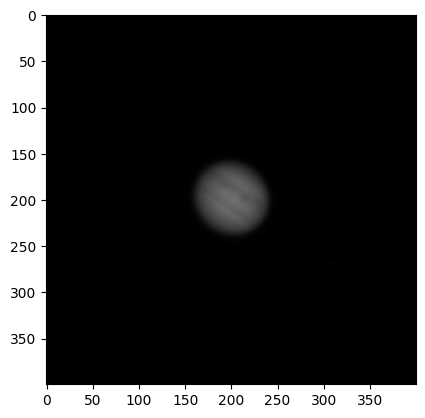

In [ ]:
image_folder = '/content/drive/MyDrive/proyecto_final_ia/jupiter_png/'

file_list = os.listdir(image_folder)
file_list = [os.path.join(image_folder, x)
            for x in file_list if x.endswith(('.jpg', '.png','.bmp'))]

tic = time()
image_name_format = 'jupiter.jpg'

description = "Stacking images using ECC method"
print(description)
stacked_image = stackImagesECC(file_list)



print("Saved {}".format(image_name_format))

cv2.imwrite(os.path.join("stacked", str(image_name_format)),stacked_image)

plt.imshow(img.imread(os.path.join("stacked", str(image_name_format))))




Stacking images using ECC method


100%|██████████| 588/588 [00:32<00:00, 17.93it/s]


 Saved saturno.jpg


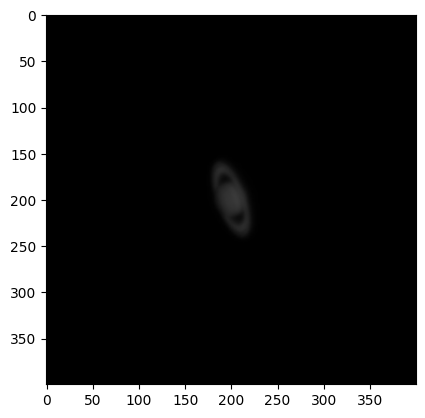

In [ ]:
image_folder = '/content/drive/MyDrive/proyecto_final_ia/Saturno_png/'

file_list = os.listdir(image_folder)
file_list = [os.path.join(image_folder, x)
            for x in file_list if x.endswith(('.jpg', '.png','.bmp'))]

image_name_format = 'saturno.jpg'

tic = time()

description = "Stacking images using ECC method"
print(description)
stacked_image = stackImagesECC(file_list)



print("\n Saved {}".format(image_name_format))

cv2.imwrite(os.path.join("stacked", str(image_name_format)),stacked_image)

plt.imshow(img.imread(os.path.join("stacked", str(image_name_format))))


Stacking images using ECC method


100%|██████████| 1160/1160 [01:56<00:00,  9.99it/s]



 Saved Moon1.jpg


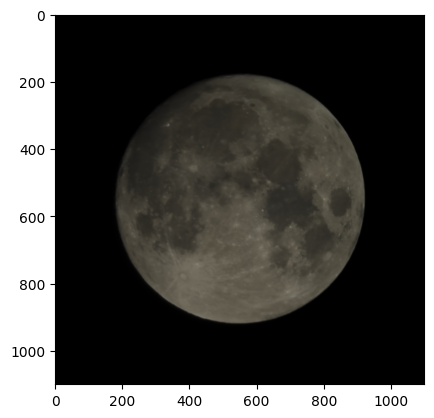

In [ ]:
image_folder = '/content/drive/MyDrive/proyecto_final_ia/1/LunaC1_1200'

file_list = os.listdir(image_folder)
file_list = [os.path.join(image_folder, x)
            for x in file_list if x.endswith(('.jpg', '.png','.bmp'))]

image_name_format = 'Moon1.jpg'



description = "Stacking images using ECC method"
print(description)
stacked_image = stackImagesKeypointMatching(file_list)



print("\n Saved {}".format(image_name_format))

cv2.imwrite(os.path.join("stacked", str(image_name_format)),stacked_image)

plt.imshow(img.imread(os.path.join("stacked", str(image_name_format))))



Stacking images using ECC method


100%|██████████| 100/100 [00:44<00:00,  2.26it/s]


 Saved Moon2.jpg


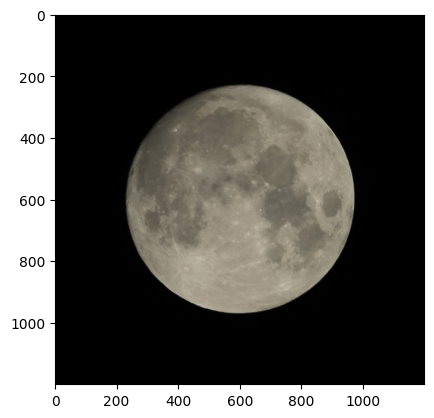

In [ ]:
image_folder = '/content/drive/MyDrive/proyecto_final_ia/2.1/LunaC2_100'

file_list = os.listdir(image_folder)
file_list = [os.path.join(image_folder, x)
            for x in file_list if x.endswith(('.jpg', '.png','.bmp'))]

image_name_format = 'Moon2.jpg'



description = "Stacking images using ECC method"
print(description)
stacked_image = stackImagesECC(file_list)



print("\n Saved {}".format(image_name_format))

cv2.imwrite(os.path.join("stacked", str(image_name_format)),stacked_image)

plt.imshow(img.imread(os.path.join("stacked", str(image_name_format))))

Stacking images using ECC method


100%|██████████| 100/100 [00:46<00:00,  2.16it/s]


 Saved Moon3.jpg


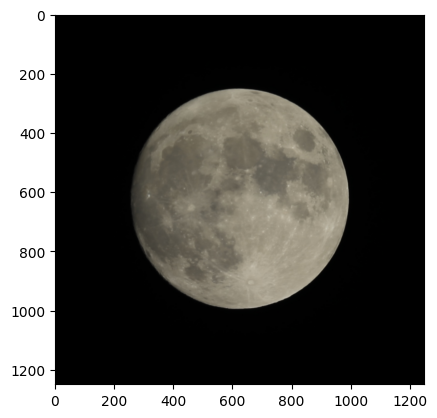

In [ ]:
image_folder = '/content/drive/MyDrive/proyecto_final_ia/3.1/LunaC3_100'

file_list = os.listdir(image_folder)
file_list = [os.path.join(image_folder, x)
            for x in file_list if x.endswith(('.jpg', '.png','.bmp'))]

image_name_format = 'Moon3.jpg'



description = "Stacking images using ECC method"
print(description)
stacked_image = stackImagesECC(file_list)



print("\n Saved {}".format(image_name_format))

cv2.imwrite(os.path.join("stacked", str(image_name_format)),stacked_image)

plt.imshow(img.imread(os.path.join("stacked", str(image_name_format))))

Stacking images using ECC method


100%|██████████| 831/831 [00:30<00:00, 27.09it/s]


 Saved Moon4.jpg


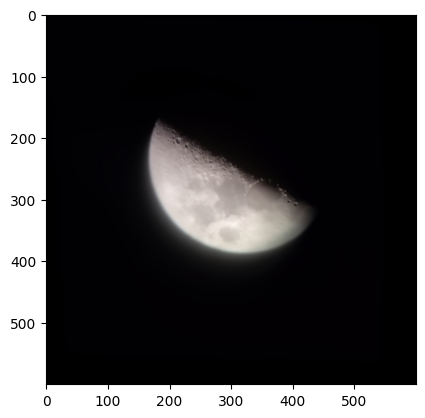

In [ ]:
image_folder = '/content/drive/MyDrive/proyecto_final_ia/Moon21_png'

file_list = os.listdir(image_folder)
file_list = [os.path.join(image_folder, x)
            for x in file_list if x.endswith(('.jpg', '.png','.bmp'))]

image_name_format = 'Moon4.jpg'



description = "Stacking images using ECC method"
print(description)
stacked_image = stackImagesKeypointMatching(file_list)



print("\n Saved {}".format(image_name_format))

cv2.imwrite(os.path.join("stacked", str(image_name_format)),stacked_image)

plt.imshow(img.imread(os.path.join("stacked", str(image_name_format))))

<div id='id4' />

## Aplicación de filtros de convolución
Realizando lo anterior, notamos que al aplicarle el stacker a las imágenes estás pierden el "enfoque" que tenían, haciendo más difusas las imágenes. Para corrigir aplicaremos spatial filtering 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as img

Creamos carpeta

In [ ]:
os.mkdir('convolution')

Aplicamos filtros de convolusion a cada imagen para resaltar la estrucura.


*   **JUPITER**



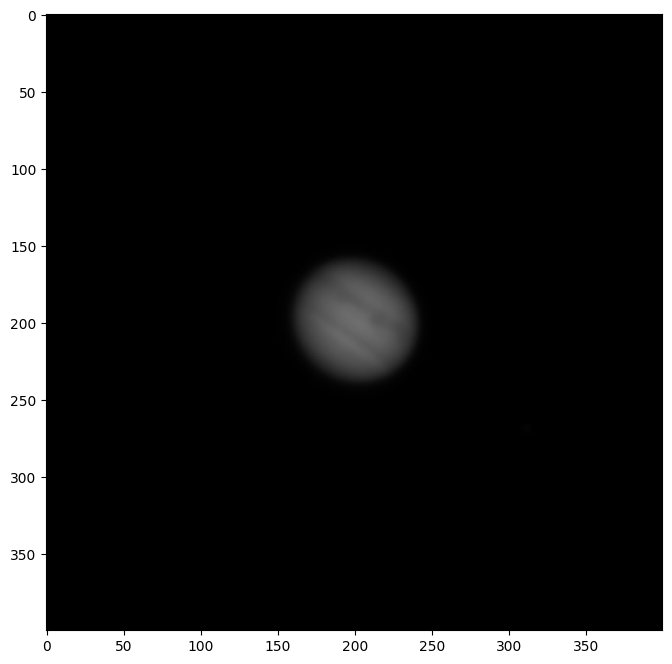

In [ ]:
import cv2

plt.figure(figsize=(20,8)) 
image = img.imread('stacked/jupiter.jpg') 
plt.imshow(image)

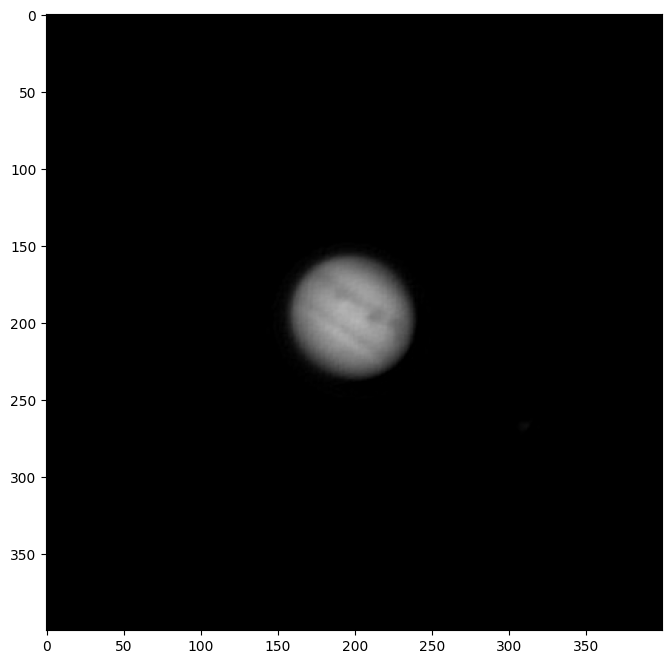

In [ ]:
#Image intensity transformation through stpatial filtering using a kernel

plt.figure(figsize=(20,8)) 
image_name = "jupiter.jpg"
image = img.imread('stacked/jupiter.jpg') #Subir Imagen

kernel_1 = np.array([[-2, -1, 0],
                    [-1, 1.6, 1],
                    [0, 1, 2]])
sharpened = cv2.filter2D(image, -1, kernel_1)


cv2.imwrite(os.path.join("convolution", image_name),sharpened)


plt.imshow(img.imread(os.path.join("convolution", image_name)))



*   **SATURN**



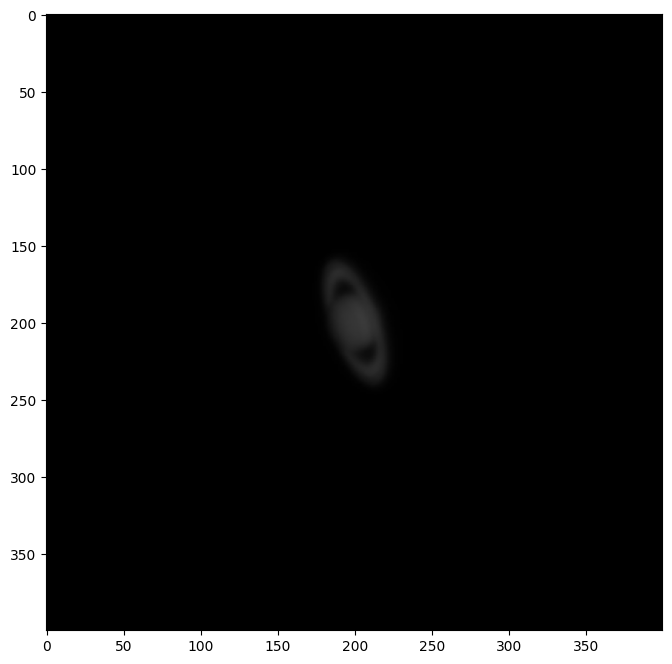

In [ ]:
plt.figure(figsize=(20,8)) 
image = img.imread('stacked/saturno.jpg') 
plt.imshow(image)

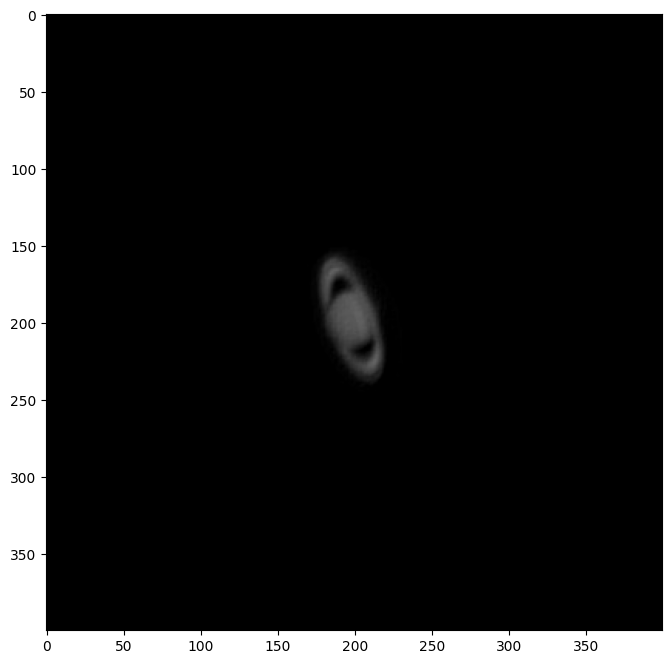

In [ ]:
#Image intensity transformation through stpatial filtering using a kernel

plt.figure(figsize=(20,8)) 
image_name = "saturno.jpg"
image = img.imread('stacked/saturno.jpg') #Subir Imagen

kernel_1 = np.array([[-2, -1, 0],
                    [-1, 1.6, 1],
                    [0, 1, 2]])
sharpened = cv2.filter2D(image, -1, kernel_1)


cv2.imwrite(os.path.join("convolution", image_name),sharpened)


plt.imshow(img.imread(os.path.join("convolution", image_name)))



*   **MOON 1**



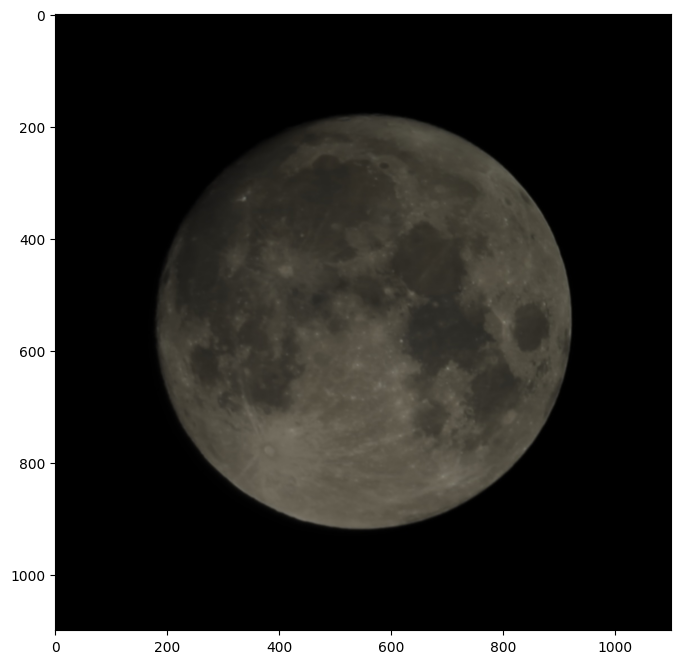

In [ ]:
plt.figure(figsize=(20,8)) 
image = img.imread('stacked/Moon1.jpg') 
plt.imshow(image)

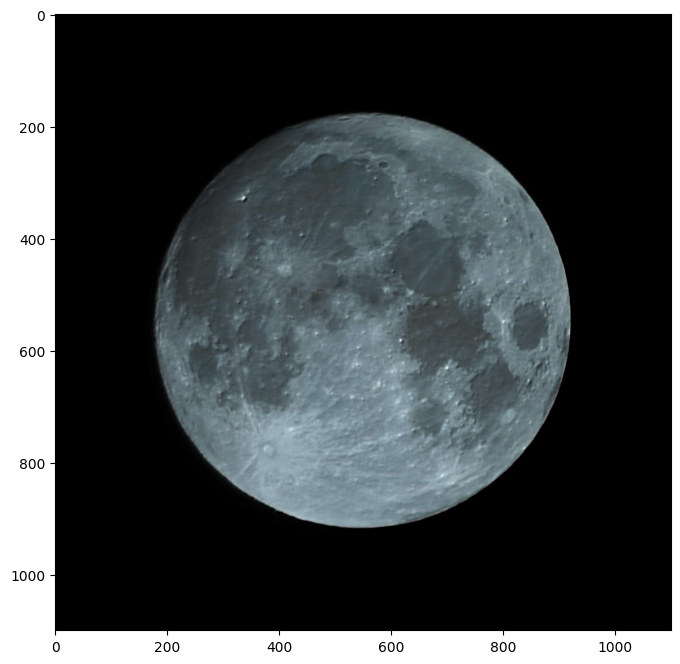

In [ ]:
#Image intensity transformation through stpatial filtering using a kernel

plt.figure(figsize=(20,8)) 
image_name = "Moon1.jpg"
image = img.imread('stacked/Moon1.jpg') #Subir Imagen

kernel_1 = np.array([[-2, -1, 0],
                    [-1, 1.6, 1],
                    [0, 1, 2]])
sharpened = cv2.filter2D(image, -1, kernel_1)


cv2.imwrite(os.path.join("convolution", image_name),sharpened)


plt.imshow(img.imread(os.path.join("convolution", image_name)))



*   **MOON 2**



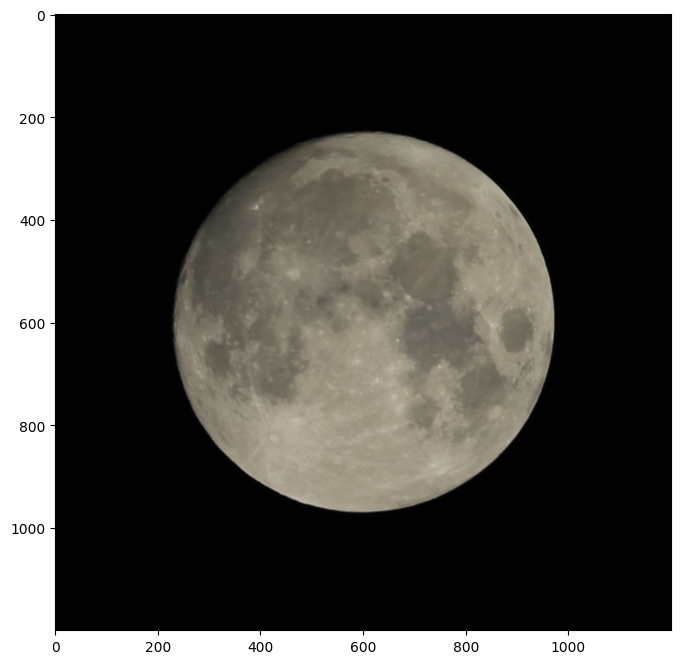

In [ ]:
plt.figure(figsize=(20,8)) 
image = img.imread('stacked/Moon2.jpg') 
plt.imshow(image)

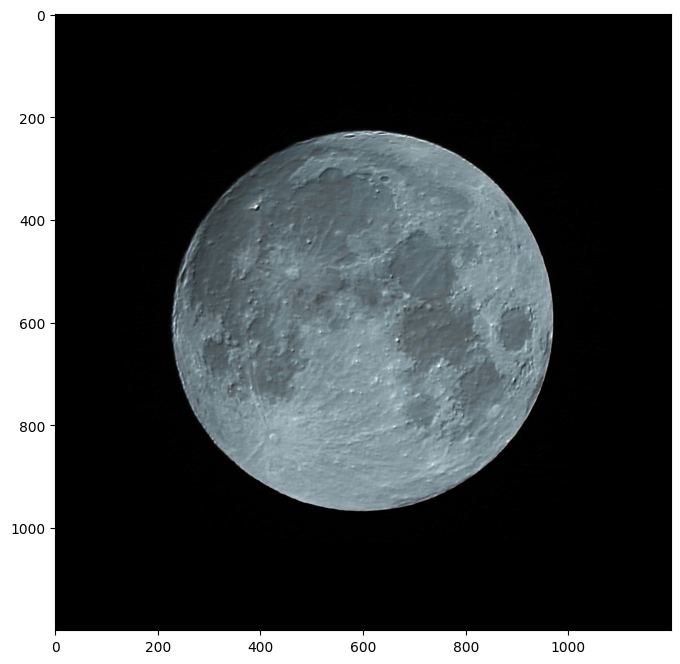

In [ ]:
#Image intensity transformation through stpatial filtering using a kernel

plt.figure(figsize=(20,8)) 
image_name = "Moon2.jpg"
image = img.imread('stacked/Moon2.jpg') #Subir Imagen

kernel_1 = np.array([[-2, -1.5, 0],
                    [-1, 1.5, 1],
                    [0, 1, 2]])
sharpened = cv2.filter2D(image, -1, kernel_1)


cv2.imwrite(os.path.join("convolution", image_name),sharpened)


plt.imshow(img.imread(os.path.join("convolution", image_name)))



*   **MOON 3**



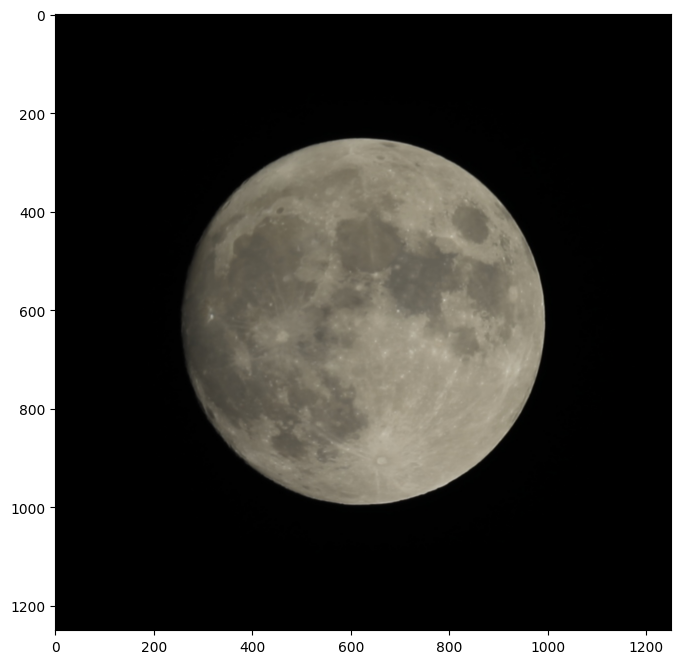

In [ ]:
plt.figure(figsize=(20,8)) 
image = img.imread('stacked/Moon3.jpg') 
plt.imshow(image)

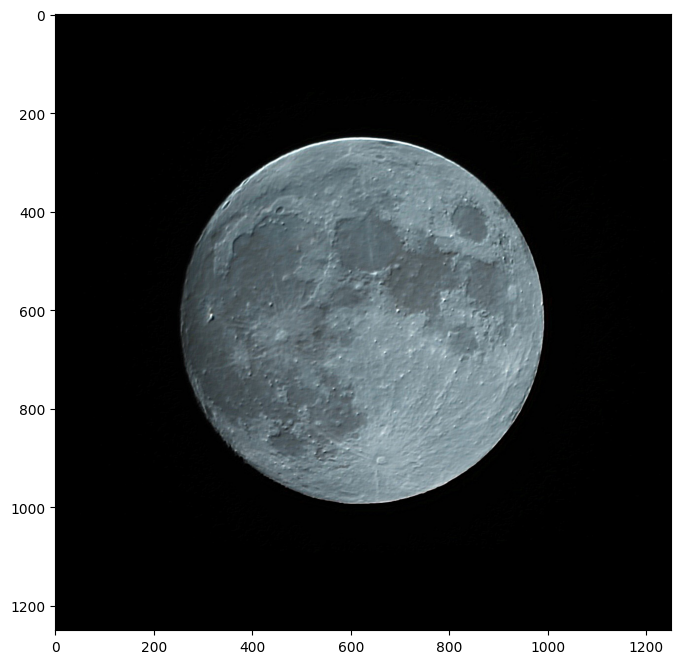

In [ ]:
#Image intensity transformation through stpatial filtering using a kernel

plt.figure(figsize=(20,8)) 
image_name = "Moon3.jpg"
image = img.imread('stacked/Moon3.jpg') #Subir Imagen

kernel_1 = np.array([[-2, -1.5, 0],
                    [-1, 1, 1],
                    [0, 1.5, 2]])
sharpened = cv2.filter2D(image, -1, kernel_1)


cv2.imwrite(os.path.join("convolution", image_name),sharpened)


plt.imshow(img.imread(os.path.join("convolution", image_name)))



*   **MOON 4**



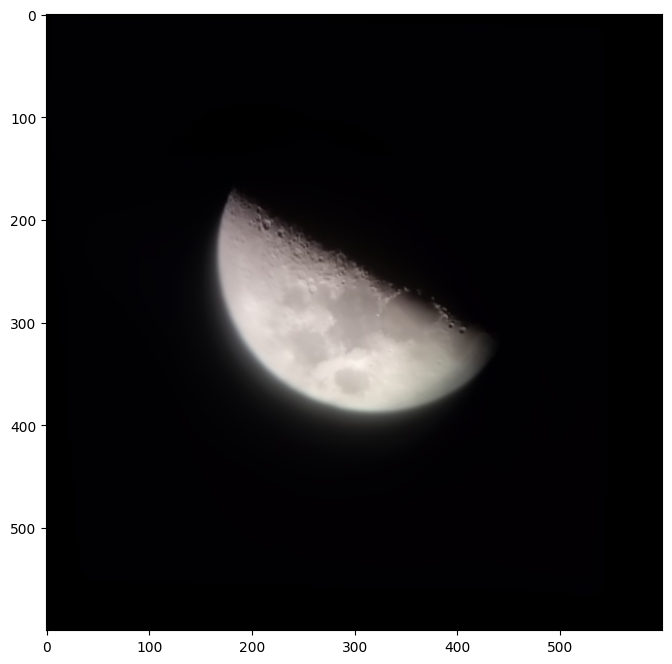

In [ ]:
plt.figure(figsize=(20,8)) 
image = img.imread('stacked/Moon4.jpg') 
plt.imshow(image)

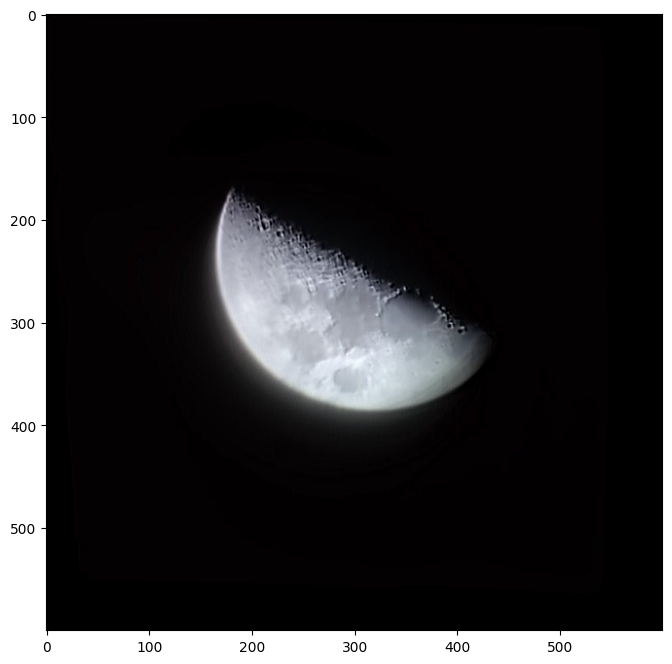

In [ ]:
#Image intensity transformation through stpatial filtering using a kernel

plt.figure(figsize=(20,8)) 
image_name = "Moon4.jpg"
image = img.imread('stacked/Moon4.jpg') #Subir Imagen

kernel_1 = np.array([[-1, -0, 0],
                    [-1, 1, 1],
                    [0, 0, 1]])
sharpened = cv2.filter2D(image, -1, kernel_1)


cv2.imwrite(os.path.join("convolution", image_name),sharpened)


plt.imshow(img.imread(os.path.join("convolution", image_name)))

<div id='id5' />

## **Implementación de la Red Neuronal (SRGAN)**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class _conv(nn.Conv2d):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, bias):
        super(_conv, self).__init__(in_channels = in_channels, out_channels = out_channels, 
                               kernel_size = kernel_size, stride = stride, padding = (kernel_size) // 2, bias = True)
        
        self.weight.data = torch.normal(torch.zeros((out_channels, in_channels, kernel_size, kernel_size)), 0.02)
        self.bias.data = torch.zeros((out_channels))
        
        for p in self.parameters():
            p.requires_grad = True
        

class conv(nn.Module):
    def __init__(self, in_channel, out_channel, kernel_size, BN = False, act = None, stride = 1, bias = True):
        super(conv, self).__init__()
        m = []
        m.append(_conv(in_channels = in_channel, out_channels = out_channel, 
                               kernel_size = kernel_size, stride = stride, padding = (kernel_size) // 2, bias = True))
        
        if BN:
            m.append(nn.BatchNorm2d(num_features = out_channel))
        
        if act is not None:
            m.append(act)
        
        self.body = nn.Sequential(*m)
        
    def forward(self, x):
        out = self.body(x)
        return out
        
class ResBlock(nn.Module):
    def __init__(self, channels, kernel_size, act = nn.ReLU(inplace = True), bias = True):
        super(ResBlock, self).__init__()
        m = []
        m.append(conv(channels, channels, kernel_size, BN = True, act = act))
        m.append(conv(channels, channels, kernel_size, BN = True, act = None))
        self.body = nn.Sequential(*m)
        
    def forward(self, x):
        res = self.body(x)
        res += x
        return res
    
class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, num_res_block, act = nn.ReLU(inplace = True)):
        super(BasicBlock, self).__init__()
        m = []
        
        self.conv = conv(in_channels, out_channels, kernel_size, BN = False, act = act)
        for i in range(num_res_block):
            m.append(ResBlock(out_channels, kernel_size, act))
        
        m.append(conv(out_channels, out_channels, kernel_size, BN = True, act = None))
        
        self.body = nn.Sequential(*m)
        
    def forward(self, x):
        res = self.conv(x)
        out = self.body(res)
        out += res
        
        return out
        
class Upsampler(nn.Module):
    def __init__(self, channel, kernel_size, scale, act = nn.ReLU(inplace = True)):
        super(Upsampler, self).__init__()
        m = []
        m.append(conv(channel, channel * scale * scale, kernel_size))
        m.append(nn.PixelShuffle(scale))
    
        if act is not None:
            m.append(act)
        
        self.body = nn.Sequential(*m)
    
    def forward(self, x):
        out = self.body(x)
        return out

        
    def forward(self, x):
        out = self.body(x)
        return out



In [ ]:
class Generator(nn.Module):
    
    def __init__(self, img_feat = 3, n_feats = 64, kernel_size = 3, num_block = 16, act = nn.PReLU(), scale=4):
        super(Generator, self).__init__()
        
        self.conv01 = conv(in_channel = img_feat, out_channel = n_feats, kernel_size = 9, BN = False, act = act)
        
        resblocks = [ResBlock(channels = n_feats, kernel_size = 3, act = act) for _ in range(num_block)]
        self.body = nn.Sequential(*resblocks)
        
        self.conv02 = conv(in_channel = n_feats, out_channel = n_feats, kernel_size = 3, BN = True, act = None)
        
        if(scale == 4):
            upsample_blocks = [Upsampler(channel = n_feats, kernel_size = 3, scale = 2, act = act) for _ in range(2)]
        else:
            upsample_blocks = [Upsampler(channel = n_feats, kernel_size = 3, scale = scale, act = act)]

        self.tail = nn.Sequential(*upsample_blocks)
        
        self.last_conv = conv(in_channel = n_feats, out_channel = img_feat, kernel_size = 3, BN = False, act = nn.Tanh())
        
    def forward(self, x):
        
        x = self.conv01(x)
        _skip_connection = x
        
        x = self.body(x)
        x = self.conv02(x)
        feat = x + _skip_connection
        
        x = self.tail(feat)
        x = self.last_conv(x)
        
        return x, feat

In [ ]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import os
from PIL import Image
import numpy as np
import random


class mydata(Dataset):
    def __init__(self, LR_path, GT_path, in_memory = True, transform = None):
        
        self.LR_path = LR_path
        self.GT_path = GT_path
        self.in_memory = in_memory
        self.transform = transform
        
        self.LR_img = sorted(os.listdir(LR_path))
        self.GT_img = sorted(os.listdir(GT_path))
        
        if in_memory:
            self.LR_img = [np.array(Image.open(os.path.join(self.LR_path, lr)).convert("RGB")).astype(np.uint8) for lr in self.LR_img]
            self.GT_img = [np.array(Image.open(os.path.join(self.GT_path, gt)).convert("RGB")).astype(np.uint8) for gt in self.GT_img]
        
    def __len__(self):
        
        return len(self.LR_img)
        
    def __getitem__(self, i):
        
        img_item = {}
        
        if self.in_memory:
            GT = self.GT_img[i].astype(np.float32)
            LR = self.LR_img[i].astype(np.float32)
            
        else:
            GT = np.array(Image.open(os.path.join(self.GT_path, self.GT_img[i])).convert("RGB"))
            LR = np.array(Image.open(os.path.join(self.LR_path, self.LR_img[i])).convert("RGB"))

        img_item['GT'] = (GT / 127.5) - 1.0
        img_item['LR'] = (LR / 127.5) - 1.0
                
        if self.transform is not None:
            img_item = self.transform(img_item)
            
        img_item['GT'] = img_item['GT'].transpose(2, 0, 1).astype(np.float32)
        img_item['LR'] = img_item['LR'].transpose(2, 0, 1).astype(np.float32)
        
        return img_item
    
    
class testOnly_data(Dataset):
    def __init__(self, LR_path, in_memory = True, transform = None):
        
        self.LR_path = LR_path
        self.LR_img = sorted(os.listdir(LR_path))
        self.in_memory = in_memory
        if in_memory:
            self.LR_img = [np.array(Image.open(os.path.join(self.LR_path, lr))) for lr in self.LR_img]
        
    def __len__(self):
        
        return len(self.LR_img)
        
    def __getitem__(self, i):
        
        img_item = {}
        
        if self.in_memory:
            LR = self.LR_img[i]
            
        else:
            LR = np.array(Image.open(os.path.join(self.LR_path, self.LR_img[i])))

        img_item['LR'] = (LR / 127.5) - 1.0                
        img_item['LR'] = img_item['LR'].transpose(2, 0, 1).astype(np.float32)
        
        return img_item


class crop(object):
    def __init__(self, scale, patch_size):
        
        self.scale = scale
        self.patch_size = patch_size
        
    def __call__(self, sample):
        LR_img, GT_img = sample['LR'], sample['GT']
        ih, iw = LR_img.shape[:2]
        
        ix = random.randrange(0, iw - self.patch_size +1)
        iy = random.randrange(0, ih - self.patch_size +1)
        
        tx = ix * self.scale
        ty = iy * self.scale
        
        LR_patch = LR_img[iy : iy + self.patch_size, ix : ix + self.patch_size]
        GT_patch = GT_img[ty : ty + (self.scale * self.patch_size), tx : tx + (self.scale * self.patch_size)]
        
        return {'LR' : LR_patch, 'GT' : GT_patch}

class augmentation(object):
    
    def __call__(self, sample):
        LR_img, GT_img = sample['LR'], sample['GT']
        
        hor_flip = random.randrange(0,2)
        ver_flip = random.randrange(0,2)
        rot = random.randrange(0,2)
    
        if hor_flip:
            temp_LR = np.fliplr(LR_img)
            LR_img = temp_LR.copy()
            temp_GT = np.fliplr(GT_img)
            GT_img = temp_GT.copy()
            
            del temp_LR, temp_GT
        
        if ver_flip:
            temp_LR = np.flipud(LR_img)
            LR_img = temp_LR.copy()
            temp_GT = np.flipud(GT_img)
            GT_img = temp_GT.copy()
            
            del temp_LR, temp_GT
            
        if rot:
            LR_img = LR_img.transpose(1, 0, 2)
            GT_img = GT_img.transpose(1, 0, 2)
        
        
        return {'LR' : LR_img, 'GT' : GT_img}
        

In [ ]:
def test_only(args):
    
    
    device = torch.device("cpu")
    dataset = testOnly_data(LR_path = args.LR_path, in_memory = False, transform = None)
    loader = DataLoader(dataset, batch_size = 1, shuffle = False, num_workers = args.num_workers)
    
    generator = Generator(img_feat = 3, n_feats = 64, kernel_size = 3, num_block = args.res_num)
    generator.load_state_dict(torch.load(args.generator_path))
    generator = generator.to(device)
    generator.eval()
    
    with torch.no_grad():
        for i, te_data in enumerate(loader):
            lr = te_data['LR'].to(device)
            output, _ = generator(lr)
            output = output[0].cpu().numpy()
            output = (output + 1.0) / 2.0
            output = output.transpose(1,2,0)
            result = Image.fromarray((output * 255.0).astype(np.uint8))
            result.save('./res_%04d.png'%i)

In [ ]:
model_folder = 'general_model.pt'
class arguments:
  def __init__(args, LR_path, num_workers, res_num, generator_path):
    args.LR_path = LR_path
    args.num_workers = num_workers
    args.res_num = res_num
    args.generator_path = generator_path

args = arguments('moon',0,16, model_folder)
test_only(args)

<div id='id7' />  

## **Evaluación de resultados**

7.3 Otras aplicaciones 

Notamos que otras aplicaciones de nuestra red neuronal entrenada puede ser en el ámbito médico o el ámbito de seguridad; en el primer caso logrando una mejor calidad para analizar estudios como resonancias magneticas, radigrafias, tomografias, y así los médicos puedan tener una mayor exactitud al momento de interpretar los resultados, por otro lado, en el ámbito de la seguridad al momento de grabar en tiendas departamentales el ingreso de los clientes, o en el gobierno al analizar las placas de un carro o sus características, entre otras aplicaciones.

* **ROSTROS EN CAMARA DE SEGURIDAD**


* Primer muestra de imagen (Stacking)

Stacking images using ECC method


100%|██████████| 147/147 [00:46<00:00,  3.13it/s]


 Saved nethan1.jpg


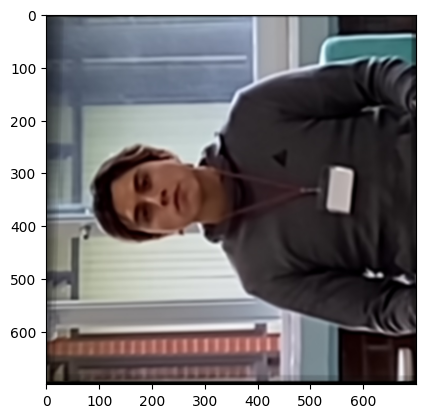

In [ ]:
image_folder = '/content/drive/MyDrive/proyecto_final_ia/Nethan/nethan_normal'

file_list = os.listdir(image_folder)
file_list = [os.path.join(image_folder, x)
            for x in file_list if x.endswith(('.jpg', '.png','.bmp'))]

image_name_format = 'nethan1.jpg'



description = "Stacking images using ECC method"
print(description)
stacked_image = stackImagesECC(file_list)



print("\n Saved {}".format(image_name_format))

cv2.imwrite(os.path.join("stacked", str(image_name_format)),stacked_image)

plt.imshow(img.imread(os.path.join("stacked", str(image_name_format))))

* Segunda muestra de imagen (Stacking)

Stacking images using ECC method


100%|██████████| 194/194 [01:50<00:00,  1.75it/s]



 Saved nethan2.jpg


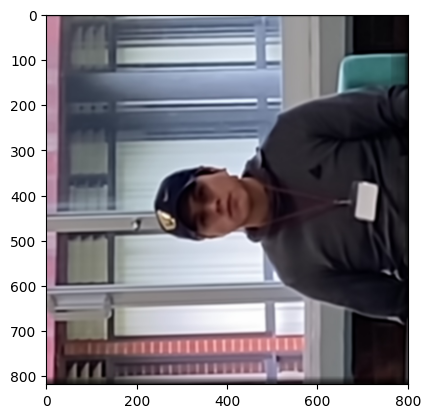

In [ ]:
image_folder = '/content/drive/MyDrive/proyecto_final_ia/Nethan/nethan_gorra'

file_list = os.listdir(image_folder)
file_list = [os.path.join(image_folder, x)
            for x in file_list if x.endswith(('.jpg', '.png','.bmp'))]

image_name_format = 'nethan2.jpg'



description = "Stacking images using ECC method"
print(description)
stacked_image = stackImagesECC(file_list)



print("\n Saved {}".format(image_name_format))

cv2.imwrite(os.path.join("stacked", str(image_name_format)),stacked_image)

plt.imshow(img.imread(os.path.join("stacked", str(image_name_format))))

* Tercera muestra de imagen (Stacking)

Stacking images using ECC method


100%|██████████| 273/273 [00:20<00:00, 13.45it/s]


 Saved nethan3.jpg


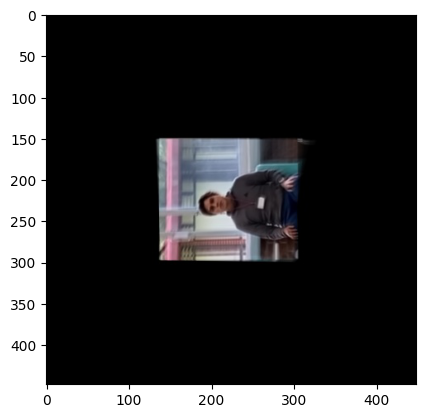

In [ ]:
image_folder = '/content/drive/MyDrive/proyecto_final_ia/Nethan/nethan_lejos'

file_list = os.listdir(image_folder)
file_list = [os.path.join(image_folder, x)
            for x in file_list if x.endswith(('.jpg', '.png','.bmp'))]

image_name_format = 'nethan3.jpg'



description = "Stacking images using ECC method"
print(description)
stacked_image = stackImagesECC(file_list)



print("\n Saved {}".format(image_name_format))

cv2.imwrite(os.path.join("stacked", str(image_name_format)),stacked_image)

plt.imshow(img.imread(os.path.join("stacked", str(image_name_format))))

* **ANÁLISIS DE PLACAS DE AUTOMÓVIL**

* Primera muestra de imagen (Stacking)

Stacking images using ECC method


100%|██████████| 187/187 [00:44<00:00,  4.25it/s]


 Saved carro1.jpg


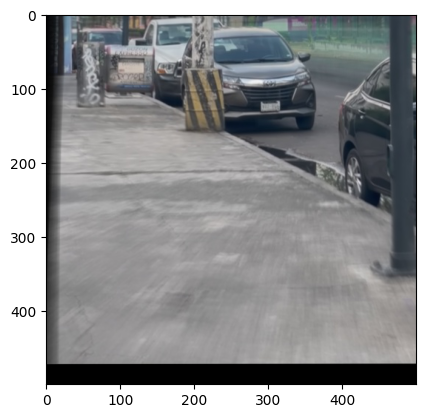

In [ ]:
image_folder = '/content/drive/MyDrive/proyecto_final_ia/Carro/Carro_cerca'

file_list = os.listdir(image_folder)
file_list = [os.path.join(image_folder, x)
            for x in file_list if x.endswith(('.jpg', '.png','.bmp'))]

image_name_format = 'carro1.jpg'



description = "Stacking images using ECC method"
print(description)
stacked_image = stackImagesECC(file_list)



print("\n Saved {}".format(image_name_format))

cv2.imwrite(os.path.join("stacked", str(image_name_format)),stacked_image)

plt.imshow(img.imread(os.path.join("stacked", str(image_name_format))))

* Segunda muestra de imagen (Stacking)

Stacking images using ECC method


100%|██████████| 198/198 [00:36<00:00,  5.48it/s]



 Saved carro2.jpg


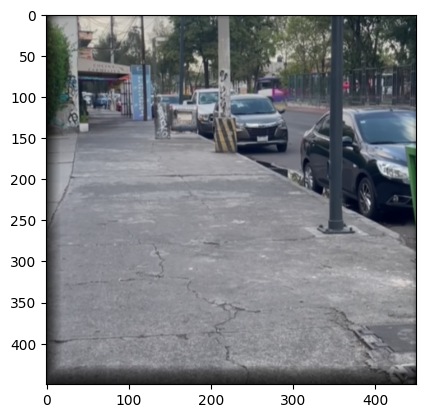

In [ ]:
image_folder = '/content/drive/MyDrive/proyecto_final_ia/Carro/Carro_lejos'

file_list = os.listdir(image_folder)
file_list = [os.path.join(image_folder, x)
            for x in file_list if x.endswith(('.jpg', '.png','.bmp'))]

image_name_format = 'carro2.jpg'



description = "Stacking images using ECC method"
print(description)
stacked_image = stackImagesECC(file_list)



print("\n Saved {}".format(image_name_format))

cv2.imwrite(os.path.join("stacked", str(image_name_format)),stacked_image)

plt.imshow(img.imread(os.path.join("stacked", str(image_name_format))))

* **ANÁLISIS EN PLACAS MÉDICAS**

* Ultrasonido realizado a los 18 meses de embarazo

Stacking images using ECC method


100%|██████████| 359/359 [02:35<00:00,  2.31it/s]


 Saved ultrasonido.jpg


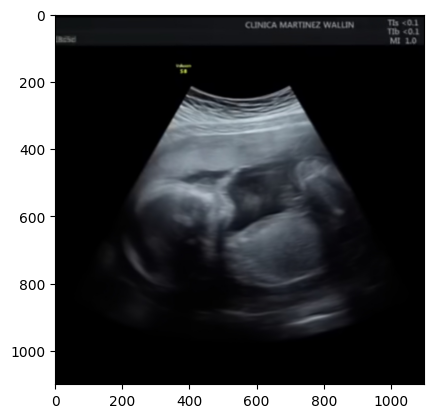

In [ ]:
image_folder = '/content/drive/MyDrive/proyecto_final_ia/Medicina/Ultrasonido_semana18'

file_list = os.listdir(image_folder)
file_list = [os.path.join(image_folder, x)
            for x in file_list if x.endswith(('.jpg', '.png','.bmp'))]

image_name_format = 'ultrasonido.jpg'



description = "Stacking images using ECC method"
print(description)
stacked_image = stackImagesECC(file_list)



print("\n Saved {}".format(image_name_format))

cv2.imwrite(os.path.join("stacked", str(image_name_format)),stacked_image)

plt.imshow(img.imread(os.path.join("stacked", str(image_name_format))))

* Rayos X para el análisis Pulmonar Sin neumonía 

Stacking images using ECC method


100%|██████████| 200/200 [04:26<00:00,  1.33s/it]


 Saved pulmones_sn.jpg


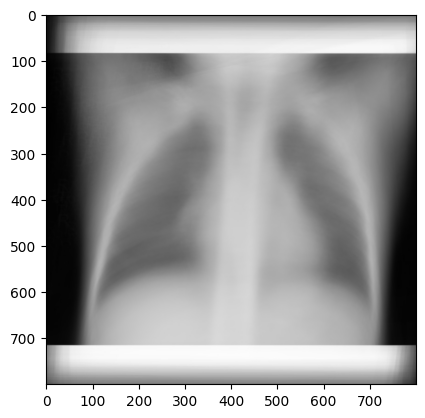

In [ ]:
image_folder = '/content/drive/MyDrive/proyecto_final_ia/Medicina/pulmones_sn'

file_list = os.listdir(image_folder)
file_list = [os.path.join(image_folder, x)
            for x in file_list if x.endswith(('.jpg', '.png','.bmp'))]

image_name_format = 'pulmones_sn.jpg'



description = "Stacking images using ECC method"
print(description)
stacked_image = stackImagesECC(file_list)



print("\n Saved {}".format(image_name_format))

cv2.imwrite(os.path.join("stacked", str(image_name_format)),stacked_image)

plt.imshow(img.imread(os.path.join("stacked", str(image_name_format))))

* Rayos X Para el análisis Pulmunar Con neumonía 

Stacking images using ECC method


100%|██████████| 210/210 [04:07<00:00,  1.18s/it]


 Saved pulmones_cn.jpg


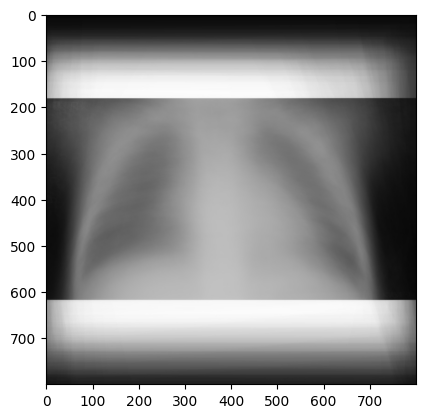

In [ ]:
image_folder = '/content/drive/MyDrive/proyecto_final_ia/Medicina/pulmones_cn'

file_list = os.listdir(image_folder)
file_list = [os.path.join(image_folder, x)
            for x in file_list if x.endswith(('.jpg', '.png','.bmp'))]

image_name_format = 'pulmones_cn.jpg'



description = "Stacking images using ECC method"
print(description)
stacked_image = stackImagesECC(file_list)



print("\n Saved {}".format(image_name_format))

cv2.imwrite(os.path.join("stacked", str(image_name_format)),stacked_image)

plt.imshow(img.imread(os.path.join("stacked", str(image_name_format))))